# SUMMER INTERN GLOBUS METRICS PROJECT

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Import CSV as data source
df = pd.read_csv('C:/Users/nss5312/Downloads/Excel/Globus_Usage_Transfer_Detail_CSV.csv')
df['request_time'] = pd.to_datetime(df['request_time'])
df = df.replace(['Northwestern AWS us-east-1 (N. Virginia)','Northwestern AWS us-east-2 (Ohio)','Northwestern AWS us-east-2 Ohio','Northwestern AWS us-west-2 (Oregon)','Northwestern AWS us-west-2 Oregon'],'Northwestern AWS')

#Create Users dataframe
users = df[['user_name']].copy()
users.drop_duplicates(inplace=True)
users = users.reset_index(drop=True)
users['numTransfers'] = None
users['encryptTrans'] = None
users['validatedTrans'] = None
users['successfulTransfers'] = None
users['successRate'] = None
users['bytesTransfered'] = None
users['dataOut'] = None
users['dataIn'] = None
users['filesDirectories'] = None
users['to_Northwestern Quest RDSS'] = None
users['from_Northwestern Quest RDSS'] = None
users['files_to_Northwestern Quest RDSS'] = None
users['files_from_Northwestern Quest RDSS'] = None
users['to_Northwestern Quest'] = None
users['from_Northwestern Quest'] = None
users['files_to_Northwestern Quest'] = None
users['files_from_Northwestern Quest'] = None
users['to_Northwestern AWS'] = None
users['from_Northwestern AWS'] = None
users['files_to_Northwestern AWS'] = None
users['files_from_Northwestern AWS'] = None
users['to_Northwestern Quest OneDrive Pilot'] = None
users['from_Northwestern Quest OneDrive Pilot'] = None
users['files_to_Northwestern Quest OneDrive Pilot'] = None
users['files_from_Northwestern Quest OneDrive Pilot'] = None
users['to_Northwestern Quest GDEP'] = None
users['from_Northwestern Quest GDEP'] = None
users['files_to_Northwestern Quest GDEP'] = None
users['files_from_Northwestern Quest GDEP'] = None
users['to_Northwestern Quest HPSNet'] = None
users['from_Northwestern Quest HPSNet'] = None
users['files_to_Northwestern Quest HPSNet'] = None
users['files_from_Northwestern Quest HPSNet'] = None
users['to_Personal'] = None
users['from_Personal'] = None
users['files_to_Personal'] = None
users['files_from_Personal'] = None
for i in users.index:
    users.at[i, 'numTransfers'] = len((df[df.user_name == users['user_name'][i]].index))
    users.at[i, 'encryptTrans'] = len(df[(df.user_name == users['user_name'][i]) & (df.encrypt_data == True)].index)
    users.at[i, 'validatedTrans'] = len(df[(df.user_name == users['user_name'][i]) & (df.verify_checksum == True)].index)
    users.at[i, 'successfulTransfers'] = len(df[(df.user_name == users['user_name'][i]) & (df.status == 'SUCCEEDED')].index)
    users.at[i, 'bytesTransfered'] = df.loc[df.user_name == users['user_name'][i], 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'dataOut'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination__endpoint_host_is_managed == False), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'dataIn'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination__endpoint_host_is_managed == True), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'filesDirectories'] = df.loc[df.user_name == users['user_name'][i], 'successful'].sum()
    users.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS'), 'files_processed'].sum()
    users.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest'), 'files_processed'].sum()
    users.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS'), 'files_processed'].sum()
    users.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot'), 'files_processed'].sum()
    users.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP'), 'files_processed'].sum()
    users.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet'), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet'), 'files_processed'].sum()
    users.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet'), 'files_processed'].sum()
    users.at[i, 'to_Personal'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination__endpoint_host_is_managed == False), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'from_Personal'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint_host_is_managed == False), 'bytes_transferred'].sum()/pow(1024, 4)
    users.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users['user_name'][i]) & (df.destination__endpoint_host_is_managed == False), 'files_processed'].sum()
    users.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users['user_name'][i]) & (df.source_endpoint_host_is_managed == False), 'files_processed'].sum()
users['successRate'] = 100 * (users['successfulTransfers'] / users['numTransfers'])
users['successRate'] = users['successRate'].apply(lambda row: round(row,2))
users['bytesTransfered'] = users['bytesTransfered'].apply(lambda row: round(row,2))
users['dataOut'] = users['bytesTransfered'].apply(lambda row: round(row,2))
users['dataIn'] = users['bytesTransfered'].apply(lambda row: round(row,2)) 
users['to_Northwestern Quest RDSS'] = users['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users['from_Northwestern Quest RDSS'] = users['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users['to_Northwestern Quest'] = users['to_Northwestern Quest'].apply(lambda row: round(row,2))
users['from_Northwestern Quest'] = users['from_Northwestern Quest'].apply(lambda row: round(row,2))
users['to_Northwestern AWS'] = users['to_Northwestern AWS'].apply(lambda row: round(row,2))
users['from_Northwestern AWS'] = users['from_Northwestern AWS'].apply(lambda row: round(row,2))
users['to_Northwestern Quest OneDrive Pilot'] = users['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users['from_Northwestern Quest OneDrive Pilot'] = users['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users['to_Northwestern Quest GDEP'] = users['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users['from_Northwestern Quest GDEP'] = users['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users['to_Northwestern Quest HPSNet'] = users['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users['from_Northwestern Quest HPSNet'] = users['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users['to_Personal'] = users['to_Personal'].apply(lambda row: round(row,2))
users['from_Personal'] = users['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2017 dataframe
users_2017 = df.loc[df.request_time.dt.year == 2017, 'user_name']
users_2017 = users_2017.drop_duplicates(inplace=False)
users_2017 = users_2017.reset_index(drop=True).to_frame()

users_2017['numTransfers'] = None
users_2017['encryptTrans'] = None
users_2017['validatedTrans'] = None
users_2017['successfulTransfers'] = None
users_2017['successRate'] = None
users_2017['bytesTransfered'] = None
users_2017['dataOut'] = None
users_2017['dataIn'] = None
users_2017['filesDirectories'] = None
users_2017['to_Northwestern Quest RDSS'] = None
users_2017['from_Northwestern Quest RDSS'] = None
users_2017['files_to_Northwestern Quest RDSS'] = None
users_2017['files_from_Northwestern Quest RDSS'] = None
users_2017['to_Northwestern Quest'] = None
users_2017['from_Northwestern Quest'] = None
users_2017['files_to_Northwestern Quest'] = None
users_2017['files_from_Northwestern Quest'] = None
users_2017['to_Northwestern AWS'] = None
users_2017['from_Northwestern AWS'] = None
users_2017['files_to_Northwestern AWS'] = None
users_2017['files_from_Northwestern AWS'] = None
users_2017['to_Northwestern Quest OneDrive Pilot'] = None
users_2017['from_Northwestern Quest OneDrive Pilot'] = None
users_2017['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2017['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2017['to_Northwestern Quest GDEP'] = None
users_2017['from_Northwestern Quest GDEP'] = None
users_2017['files_to_Northwestern Quest GDEP'] = None
users_2017['files_from_Northwestern Quest GDEP'] = None
users_2017['to_Northwestern Quest HPSNet'] = None
users_2017['from_Northwestern Quest HPSNet'] = None
users_2017['files_to_Northwestern Quest HPSNet'] = None
users_2017['files_from_Northwestern Quest HPSNet'] = None
users_2017['to_Personal'] = None
users_2017['from_Personal'] = None
users_2017['files_to_Personal'] = None
users_2017['files_from_Personal'] = None
for i in users_2017.index:
    users_2017.at[i, 'numTransfers'] = len((df[(df.user_name == users_2017['user_name'][i]) & (df.request_time.dt.year == 2017)].index))
    users_2017.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2017['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2017)].index)
    users_2017.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2017['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2017)].index)
    users_2017.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2017['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2017)].index)
    users_2017.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'dataOut'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'dataIn'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.request_time.dt.year == 2017), 'successful'].sum()
    users_2017.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2017.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'files_processed'].sum()
    users_2017.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2017['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'files_processed'].sum()
users_2017['successRate'] = 100 * (users_2017['successfulTransfers'] / users_2017['numTransfers'])
users_2017['successRate'] = users_2017['successRate'].apply(lambda row: round(row,2))
users_2017['bytesTransfered'] = users_2017['bytesTransfered'].apply(lambda row: round(row,2))
users_2017['dataOut'] = users_2017['bytesTransfered'].apply(lambda row: round(row,2))
users_2017['dataIn'] = users_2017['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2017['to_Northwestern Quest RDSS'] = users_2017['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2017['from_Northwestern Quest RDSS'] = users_2017['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2017['to_Northwestern Quest'] = users_2017['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2017['from_Northwestern Quest'] = users_2017['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2017['to_Northwestern AWS'] = users_2017['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2017['from_Northwestern AWS'] = users_2017['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2017['to_Northwestern Quest OneDrive Pilot'] = users_2017['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2017['from_Northwestern Quest OneDrive Pilot'] = users_2017['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2017['to_Northwestern Quest GDEP'] = users_2017['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2017['from_Northwestern Quest GDEP'] = users_2017['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2017['to_Northwestern Quest HPSNet'] = users_2017['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2017['from_Northwestern Quest HPSNet'] = users_2017['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2017['to_Personal'] = users_2017['to_Personal'].apply(lambda row: round(row,2))
users_2017['from_Personal'] = users_2017['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2018 dataframe
users_2018 = df.loc[df.request_time.dt.year == 2018, 'user_name']
users_2018 = users_2018.drop_duplicates(inplace=False)
users_2018 = users_2018.reset_index(drop=True).to_frame()

users_2018['numTransfers'] = None
users_2018['encryptTrans'] = None
users_2018['validatedTrans'] = None
users_2018['successfulTransfers'] = None
users_2018['successRate'] = None
users_2018['bytesTransfered'] = None
users_2018['dataOut'] = None
users_2018['dataIn'] = None
users_2018['filesDirectories'] = None
users_2018['to_Northwestern Quest RDSS'] = None
users_2018['from_Northwestern Quest RDSS'] = None
users_2018['files_to_Northwestern Quest RDSS'] = None
users_2018['files_from_Northwestern Quest RDSS'] = None
users_2018['to_Northwestern Quest'] = None
users_2018['from_Northwestern Quest'] = None
users_2018['files_to_Northwestern Quest'] = None
users_2018['files_from_Northwestern Quest'] = None
users_2018['to_Northwestern AWS'] = None
users_2018['from_Northwestern AWS'] = None
users_2018['files_to_Northwestern AWS'] = None
users_2018['files_from_Northwestern AWS'] = None
users_2018['to_Northwestern Quest OneDrive Pilot'] = None
users_2018['from_Northwestern Quest OneDrive Pilot'] = None
users_2018['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2018['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2018['to_Northwestern Quest GDEP'] = None
users_2018['from_Northwestern Quest GDEP'] = None
users_2018['files_to_Northwestern Quest GDEP'] = None
users_2018['files_from_Northwestern Quest GDEP'] = None
users_2018['to_Northwestern Quest HPSNet'] = None
users_2018['from_Northwestern Quest HPSNet'] = None
users_2018['files_to_Northwestern Quest HPSNet'] = None
users_2018['files_from_Northwestern Quest HPSNet'] = None
users_2018['to_Personal'] = None
users_2018['from_Personal'] = None
users_2018['files_to_Personal'] = None
users_2018['files_from_Personal'] = None
for i in users_2018.index:
    users_2018.at[i, 'numTransfers'] = len((df[(df.user_name == users_2018['user_name'][i]) & (df.request_time.dt.year == 2018)].index))
    users_2018.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2018['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2018)].index)
    users_2018.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2018['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2018)].index)
    users_2018.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2018['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2018)].index)
    users_2018.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'dataOut'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'dataIn'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.request_time.dt.year == 2018), 'successful'].sum()
    users_2018.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2018.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'files_processed'].sum()
    users_2018.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2018['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'files_processed'].sum()
users_2018['successRate'] = 100 * (users_2018['successfulTransfers'] / users_2018['numTransfers'])
users_2018['successRate'] = users_2018['successRate'].apply(lambda row: round(row,2))
users_2018['bytesTransfered'] = users_2018['bytesTransfered'].apply(lambda row: round(row,2))
users_2018['dataOut'] = users_2018['bytesTransfered'].apply(lambda row: round(row,2))
users_2018['dataIn'] = users_2018['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2018['to_Northwestern Quest RDSS'] = users_2018['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2018['from_Northwestern Quest RDSS'] = users_2018['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2018['to_Northwestern Quest'] = users_2018['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2018['from_Northwestern Quest'] = users_2018['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2018['to_Northwestern AWS'] = users_2018['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2018['from_Northwestern AWS'] = users_2018['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2018['to_Northwestern Quest OneDrive Pilot'] = users_2018['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2018['from_Northwestern Quest OneDrive Pilot'] = users_2018['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2018['to_Northwestern Quest GDEP'] = users_2018['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2018['from_Northwestern Quest GDEP'] = users_2018['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2018['to_Northwestern Quest HPSNet'] = users_2018['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2018['from_Northwestern Quest HPSNet'] = users_2018['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2018['to_Personal'] = users_2018['to_Personal'].apply(lambda row: round(row,2))
users_2018['from_Personal'] = users_2018['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2019 dataframe
users_2019 = df.loc[df.request_time.dt.year == 2019, 'user_name']
users_2019 = users_2019.drop_duplicates(inplace=False)
users_2019 = users_2019.reset_index(drop=True).to_frame()

users_2019['numTransfers'] = None
users_2019['encryptTrans'] = None
users_2019['validatedTrans'] = None
users_2019['successfulTransfers'] = None
users_2019['successRate'] = None
users_2019['bytesTransfered'] = None
users_2019['dataOut'] = None
users_2019['dataIn'] = None
users_2019['filesDirectories'] = None
users_2019['to_Northwestern Quest RDSS'] = None
users_2019['from_Northwestern Quest RDSS'] = None
users_2019['files_to_Northwestern Quest RDSS'] = None
users_2019['files_from_Northwestern Quest RDSS'] = None
users_2019['to_Northwestern Quest'] = None
users_2019['from_Northwestern Quest'] = None
users_2019['files_to_Northwestern Quest'] = None
users_2019['files_from_Northwestern Quest'] = None
users_2019['to_Northwestern AWS'] = None
users_2019['from_Northwestern AWS'] = None
users_2019['files_to_Northwestern AWS'] = None
users_2019['files_from_Northwestern AWS'] = None
users_2019['to_Northwestern Quest OneDrive Pilot'] = None
users_2019['from_Northwestern Quest OneDrive Pilot'] = None
users_2019['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2019['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2019['to_Northwestern Quest GDEP'] = None
users_2019['from_Northwestern Quest GDEP'] = None
users_2019['files_to_Northwestern Quest GDEP'] = None
users_2019['files_from_Northwestern Quest GDEP'] = None
users_2019['to_Northwestern Quest HPSNet'] = None
users_2019['from_Northwestern Quest HPSNet'] = None
users_2019['files_to_Northwestern Quest HPSNet'] = None
users_2019['files_from_Northwestern Quest HPSNet'] = None
users_2019['to_Personal'] = None
users_2019['from_Personal'] = None
users_2019['files_to_Personal'] = None
users_2019['files_from_Personal'] = None
for i in users_2019.index:
    users_2019.at[i, 'numTransfers'] = len((df[(df.user_name == users_2019['user_name'][i]) & (df.request_time.dt.year == 2019)].index))
    users_2019.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2019['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2019)].index)
    users_2019.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2019['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2019)].index)
    users_2019.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2019['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2019)].index)
    users_2019.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'dataOut'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'dataIn'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.request_time.dt.year == 2019), 'successful'].sum()
    users_2019.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2019.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'files_processed'].sum()
    users_2019.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2019['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'files_processed'].sum()
users_2019['successRate'] = 100 * (users_2019['successfulTransfers'] / users_2019['numTransfers'])
users_2019['successRate'] = users_2019['successRate'].apply(lambda row: round(row,2))
users_2019['bytesTransfered'] = users_2019['bytesTransfered'].apply(lambda row: round(row,2))
users_2019['dataOut'] = users_2019['bytesTransfered'].apply(lambda row: round(row,2))
users_2019['dataIn'] = users_2019['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2019['to_Northwestern Quest RDSS'] = users_2019['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2019['from_Northwestern Quest RDSS'] = users_2019['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2019['to_Northwestern Quest'] = users_2019['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2019['from_Northwestern Quest'] = users_2019['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2019['to_Northwestern AWS'] = users_2019['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2019['from_Northwestern AWS'] = users_2019['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2019['to_Northwestern Quest OneDrive Pilot'] = users_2019['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2019['from_Northwestern Quest OneDrive Pilot'] = users_2019['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2019['to_Northwestern Quest GDEP'] = users_2019['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2019['from_Northwestern Quest GDEP'] = users_2019['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2019['to_Northwestern Quest HPSNet'] = users_2019['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2019['from_Northwestern Quest HPSNet'] = users_2019['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2019['to_Personal'] = users_2019['to_Personal'].apply(lambda row: round(row,2))
users_2019['from_Personal'] = users_2019['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2020 dataframe
users_2020 = df.loc[df.request_time.dt.year == 2020, 'user_name']
users_2020 = users_2020.drop_duplicates(inplace=False)
users_2020 = users_2020.reset_index(drop=True).to_frame()

users_2020['numTransfers'] = None
users_2020['encryptTrans'] = None
users_2020['validatedTrans'] = None
users_2020['successfulTransfers'] = None
users_2020['successRate'] = None
users_2020['bytesTransfered'] = None
users_2020['dataOut'] = None
users_2020['dataIn'] = None
users_2020['filesDirectories'] = None
users_2020['to_Northwestern Quest RDSS'] = None
users_2020['from_Northwestern Quest RDSS'] = None
users_2020['files_to_Northwestern Quest RDSS'] = None
users_2020['files_from_Northwestern Quest RDSS'] = None
users_2020['to_Northwestern Quest'] = None
users_2020['from_Northwestern Quest'] = None
users_2020['files_to_Northwestern Quest'] = None
users_2020['files_from_Northwestern Quest'] = None
users_2020['to_Northwestern AWS'] = None
users_2020['from_Northwestern AWS'] = None
users_2020['files_to_Northwestern AWS'] = None
users_2020['files_from_Northwestern AWS'] = None
users_2020['to_Northwestern Quest OneDrive Pilot'] = None
users_2020['from_Northwestern Quest OneDrive Pilot'] = None
users_2020['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2020['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2020['to_Northwestern Quest GDEP'] = None
users_2020['from_Northwestern Quest GDEP'] = None
users_2020['files_to_Northwestern Quest GDEP'] = None
users_2020['files_from_Northwestern Quest GDEP'] = None
users_2020['to_Northwestern Quest HPSNet'] = None
users_2020['from_Northwestern Quest HPSNet'] = None
users_2020['files_to_Northwestern Quest HPSNet'] = None
users_2020['files_from_Northwestern Quest HPSNet'] = None
users_2020['to_Personal'] = None
users_2020['from_Personal'] = None
users_2020['files_to_Personal'] = None
users_2020['files_from_Personal'] = None
for i in users_2020.index:
    users_2020.at[i, 'numTransfers'] = len((df[(df.user_name == users_2020['user_name'][i]) & (df.request_time.dt.year == 2020)].index))
    users_2020.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2020['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2020)].index)
    users_2020.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2020['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2020)].index)
    users_2020.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2020['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2020)].index)
    users_2020.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'dataOut'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'dataIn'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.request_time.dt.year == 2020), 'successful'].sum()
    users_2020.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2020.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'files_processed'].sum()
    users_2020.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2020['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'files_processed'].sum()
users_2020['successRate'] = 100 * (users['successfulTransfers'] / users_2020['numTransfers'])
users_2020['successRate'] = users_2020['successRate'].apply(lambda row: round(row,2))
users_2020['bytesTransfered'] = users_2020['bytesTransfered'].apply(lambda row: round(row,2))
users_2020['dataOut'] = users_2020['bytesTransfered'].apply(lambda row: round(row,2))
users_2020['dataIn'] = users_2020['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2020['to_Northwestern Quest RDSS'] = users_2020['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2020['from_Northwestern Quest RDSS'] = users_2020['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2020['to_Northwestern Quest'] = users_2020['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2020['from_Northwestern Quest'] = users_2020['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2020['to_Northwestern AWS'] = users_2020['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2020['from_Northwestern AWS'] = users_2020['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2020['to_Northwestern Quest OneDrive Pilot'] = users_2020['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2020['from_Northwestern Quest OneDrive Pilot'] = users_2020['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2020['to_Northwestern Quest GDEP'] = users_2020['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2020['from_Northwestern Quest GDEP'] = users_2020['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2020['to_Northwestern Quest HPSNet'] = users_2020['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2020['from_Northwestern Quest HPSNet'] = users_2020['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2020['to_Personal'] = users_2020['to_Personal'].apply(lambda row: round(row,2))
users_2020['from_Personal'] = users_2020['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2021 dataframe
users_2021 = df.loc[df.request_time.dt.year == 2021, 'user_name']
users_2021 = users_2021.drop_duplicates(inplace=False)
users_2021 = users_2021.reset_index(drop=True).to_frame()

users_2021['numTransfers'] = None
users_2021['encryptTrans'] = None
users_2021['validatedTrans'] = None
users_2021['successfulTransfers'] = None
users_2021['successRate'] = None
users_2021['bytesTransfered'] = None
users_2021['dataOut'] = None
users_2021['dataIn'] = None
users_2021['filesDirectories'] = None
users_2021['to_Northwestern Quest RDSS'] = None
users_2021['from_Northwestern Quest RDSS'] = None
users_2021['files_to_Northwestern Quest RDSS'] = None
users_2021['files_from_Northwestern Quest RDSS'] = None
users_2021['to_Northwestern Quest'] = None
users_2021['from_Northwestern Quest'] = None
users_2021['files_to_Northwestern Quest'] = None
users_2021['files_from_Northwestern Quest'] = None
users_2021['to_Northwestern AWS'] = None
users_2021['from_Northwestern AWS'] = None
users_2021['files_to_Northwestern AWS'] = None
users_2021['files_from_Northwestern AWS'] = None
users_2021['to_Northwestern Quest OneDrive Pilot'] = None
users_2021['from_Northwestern Quest OneDrive Pilot'] = None
users_2021['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2021['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2021['to_Northwestern Quest GDEP'] = None
users_2021['from_Northwestern Quest GDEP'] = None
users_2021['files_to_Northwestern Quest GDEP'] = None
users_2021['files_from_Northwestern Quest GDEP'] = None
users_2021['to_Northwestern Quest HPSNet'] = None
users_2021['from_Northwestern Quest HPSNet'] = None
users_2021['files_to_Northwestern Quest HPSNet'] = None
users_2021['files_from_Northwestern Quest HPSNet'] = None
users_2021['to_Personal'] = None
users_2021['from_Personal'] = None
users_2021['files_to_Personal'] = None
users_2021['files_from_Personal'] = None
for i in users_2021.index:
    users_2021.at[i, 'numTransfers'] = len((df[(df.user_name == users_2021['user_name'][i]) & (df.request_time.dt.year == 2021)].index))
    users_2021.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2021['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2021)].index)
    users_2021.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2021['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2021)].index)
    users_2021.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2021['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2021)].index)
    users_2021.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'dataOut'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'dataIn'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.request_time.dt.year == 2021), 'successful'].sum()
    users_2021.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2021.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'files_processed'].sum()
    users_2021.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2021['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'files_processed'].sum()
users_2021['successRate'] = 100 * (users_2021['successfulTransfers'] / users_2021['numTransfers'])
users_2021['successRate'] = users_2021['successRate'].apply(lambda row: round(row,2))
users_2021['bytesTransfered'] = users['bytesTransfered'].apply(lambda row: round(row,2))
users_2021['dataOut'] = users_2021['bytesTransfered'].apply(lambda row: round(row,2))
users_2021['dataIn'] = users_2021['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2021['to_Northwestern Quest RDSS'] = users_2021['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2021['from_Northwestern Quest RDSS'] = users_2021['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2021['to_Northwestern Quest'] = users_2021['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2021['from_Northwestern Quest'] = users_2021['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2021['to_Northwestern AWS'] = users_2021['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2021['from_Northwestern AWS'] = users_2021['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2021['to_Northwestern Quest OneDrive Pilot'] = users_2021['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2021['from_Northwestern Quest OneDrive Pilot'] = users_2021['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2021['to_Northwestern Quest GDEP'] = users_2021['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2021['from_Northwestern Quest GDEP'] = users_2021['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2021['to_Northwestern Quest HPSNet'] = users_2021['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2021['from_Northwestern Quest HPSNet'] = users_2021['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2021['to_Personal'] = users_2021['to_Personal'].apply(lambda row: round(row,2))
users_2021['from_Personal'] = users_2021['from_Personal'].apply(lambda row: round(row,2))

#Create Users_2022 dataframe
users_2022 = df.loc[df.request_time.dt.year == 2022, 'user_name']
users_2022 = users_2022.drop_duplicates(inplace=False)
users_2022= users_2022.reset_index(drop=True).to_frame()

users_2022['numTransfers'] = None
users_2022['encryptTrans'] = None
users_2022['validatedTrans'] = None
users_2022['successfulTransfers'] = None
users_2022['successRate'] = None
users_2022['bytesTransfered'] = None
users_2022['dataOut'] = None
users_2022['dataIn'] = None
users_2022['filesDirectories'] = None
users_2022['to_Northwestern Quest RDSS'] = None
users_2022['from_Northwestern Quest RDSS'] = None
users_2022['files_to_Northwestern Quest RDSS'] = None
users_2022['files_from_Northwestern Quest RDSS'] = None
users_2022['to_Northwestern Quest'] = None
users_2022['from_Northwestern Quest'] = None
users_2022['files_to_Northwestern Quest'] = None
users_2022['files_from_Northwestern Quest'] = None
users_2022['to_Northwestern AWS'] = None
users_2022['from_Northwestern AWS'] = None
users_2022['files_to_Northwestern AWS'] = None
users_2022['files_from_Northwestern AWS'] = None
users_2022['to_Northwestern Quest OneDrive Pilot'] = None
users_2022['from_Northwestern Quest OneDrive Pilot'] = None
users_2022['files_to_Northwestern Quest OneDrive Pilot'] = None
users_2022['files_from_Northwestern Quest OneDrive Pilot'] = None
users_2022['to_Northwestern Quest GDEP'] = None
users_2022['from_Northwestern Quest GDEP'] = None
users_2022['files_to_Northwestern Quest GDEP'] = None
users_2022['files_from_Northwestern Quest GDEP'] = None
users_2022['to_Northwestern Quest HPSNet'] = None
users_2022['from_Northwestern Quest HPSNet'] = None
users_2022['files_to_Northwestern Quest HPSNet'] = None
users_2022['files_from_Northwestern Quest HPSNet'] = None
users_2022['to_Personal'] = None
users_2022['from_Personal'] = None
users_2022['files_to_Personal'] = None
users_2022['files_from_Personal'] = None
for i in users_2022.index:
    users_2022.at[i, 'numTransfers'] = len((df[(df.user_name == users_2022['user_name'][i]) & (df.request_time.dt.year == 2022)].index))
    users_2022.at[i, 'encryptTrans'] = len(df[(df.user_name == users_2022['user_name'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2022)].index)
    users_2022.at[i, 'validatedTrans'] = len(df[(df.user_name == users_2022['user_name'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2022)].index)
    users_2022.at[i, 'successfulTransfers'] = len(df[(df.user_name == users_2022['user_name'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2022)].index)
    users_2022.at[i, 'bytesTransfered'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'dataOut'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'dataIn'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'filesDirectories'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.request_time.dt.year == 2022), 'successful'].sum()
    users_2022.at[i, 'to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern Quest RDSS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Northwestern Quest'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern Quest'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern Quest'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern Quest'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Northwestern AWS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern AWS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern AWS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern AWS'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern Quest OneDrive Pilot'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern Quest GDEP'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Northwestern Quest HPSNet'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'to_Personal'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'from_Personal'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
    users_2022.at[i, 'files_to_Personal'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'files_processed'].sum()
    users_2022.at[i, 'files_from_Personal'] = df.loc[(df.user_name == users_2022['user_name'][i]) & (df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'files_processed'].sum()
users_2022['successRate'] = 100 * (users_2022['successfulTransfers'] / users_2022['numTransfers'])
users_2022['successRate'] = users_2022['successRate'].apply(lambda row: round(row,2))
users_2022['bytesTransfered'] = users_2022['bytesTransfered'].apply(lambda row: round(row,2))
users_2022['dataOut'] = users_2022['bytesTransfered'].apply(lambda row: round(row,2))
users_2022['dataIn'] = users_2022['bytesTransfered'].apply(lambda row: round(row,2)) 
users_2022['to_Northwestern Quest RDSS'] = users_2022['to_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2022['from_Northwestern Quest RDSS'] = users_2022['from_Northwestern Quest RDSS'].apply(lambda row: round(row,2))
users_2022['to_Northwestern Quest'] = users_2022['to_Northwestern Quest'].apply(lambda row: round(row,2))
users_2022['from_Northwestern Quest'] = users_2022['from_Northwestern Quest'].apply(lambda row: round(row,2))
users_2022['to_Northwestern AWS'] = users_2022['to_Northwestern AWS'].apply(lambda row: round(row,2))
users_2022['from_Northwestern AWS'] = users_2022['from_Northwestern AWS'].apply(lambda row: round(row,2))
users_2022['to_Northwestern Quest OneDrive Pilot'] = users_2022['to_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2022['from_Northwestern Quest OneDrive Pilot'] = users_2022['from_Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
users_2022['to_Northwestern Quest GDEP'] = users_2022['to_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2022['from_Northwestern Quest GDEP'] = users_2022['from_Northwestern Quest GDEP'].apply(lambda row: round(row,2))
users_2022['to_Northwestern Quest HPSNet'] = users_2022['to_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2022['from_Northwestern Quest HPSNet'] = users_2022['from_Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
users_2022['to_Personal'] = users_2022['to_Personal'].apply(lambda row: round(row,2))
users_2022['from_Personal'] = users_2022['from_Personal'].apply(lambda row: round(row,2))

#Create endPoints dataframe
endpoints = {"source_endpoints": ["Northwestern Quest RDSS", "Northwestern Quest", "Northwestern AWS", "Northwestern Quest OneDrive Pilot", "Northwestern Quest GDEP", "Northwestern Quest HPSNet", "Personal"]}
endpoint = pd.DataFrame(endpoints)
endpoint['numTransfers'] = None
endpoint['encryptTrans'] = None
endpoint['validatedTrans'] = None
endpoint['successfulTransfers'] = None
endpoint['successRate'] = None
endpoint['bytesTransfered'] = None
endpoint['dataOut'] = None
endpoint['dataIn'] = None
endpoint['filesDirectories'] = None
endpoint['Northwestern Quest RDSS'] = None
endpoint['Northwestern Quest'] = None
endpoint['Northwestern AWS'] = None
endpoint['Northwestern Quest OneDrive Pilot'] = None
endpoint['Northwestern Quest GDEP'] = None
endpoint['Northwestern Quest HPSNet'] = None
endpoint['Personal'] = None
for i in endpoint.index:
    if endpoint['source_endpoints'][i] != 'Personal':
        endpoint.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint['source_endpoints'][i])].index)
        endpoint.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.encrypt_data == True)].index)
        endpoint.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.verify_checksum == True)].index)
        endpoint.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.status == 'SUCCEEDED')].index)
        endpoint.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint['source_endpoints'][i]) | (df.destination_endpoint == endpoint['source_endpoints'][i])), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint['source_endpoints'][i]), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]), 'successful'].sum()
        endpoint.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False)].index)
        endpoint.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True)].index)
        endpoint.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True)].index)
        endpoint.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED')].index)
        endpoint.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False), 'successful'].sum()
        endpoint.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet'), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint.at[i, 'successRate'] = 100 * (endpoint['successfulTransfers'][i] / endpoint['numTransfers'][i])
    except ZeroDivisionError:
        endpoint.at[i, 'successRate'] = 0
endpoint['bytesTransfered'] = endpoint['bytesTransfered'].apply(lambda row: round(row,2))
endpoint['dataOut'] = endpoint['dataOut'].apply(lambda row: round(row,2))
endpoint['dataIn'] = endpoint['dataIn'].apply(lambda row: round(row,2))
endpoint['successRate'] = endpoint['successRate'].apply(lambda row: round(row,2))
endpoint['Northwestern Quest RDSS'] = endpoint['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint['Northwestern Quest'] = endpoint['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint['Northwestern AWS'] = endpoint['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint['Northwestern Quest OneDrive Pilot'] = endpoint['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint['Northwestern Quest GDEP'] = endpoint['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint['Northwestern Quest HPSNet'] = endpoint['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint['Personal'] = endpoint['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2017 dataframe
endpoint_2017 = pd.DataFrame(endpoints)

endpoint_2017['numTransfers'] = None
endpoint_2017['encryptTrans'] = None
endpoint_2017['validatedTrans'] = None
endpoint_2017['successfulTransfers'] = None
endpoint_2017['successRate'] = None
endpoint_2017['bytesTransfered'] = None
endpoint_2017['dataOut'] = None
endpoint_2017['dataIn'] = None
endpoint_2017['filesDirectories'] = None
endpoint_2017['Northwestern Quest RDSS'] = None
endpoint_2017['Northwestern Quest'] = None
endpoint_2017['Northwestern AWS'] = None
endpoint_2017['Northwestern Quest OneDrive Pilot'] = None
endpoint_2017['Northwestern Quest GDEP'] = None
endpoint_2017['Northwestern Quest HPSNet'] = None
endpoint_2017['Personal'] = None
for i in endpoint_2017.index:
    if endpoint_2017['source_endpoints'][i] != 'Personal':
        endpoint_2017.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.request_time.dt.year == 2017)].index )
        endpoint_2017.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2017['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2017['source_endpoints'][i])) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2017['source_endpoints'][i]) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.request_time.dt.year == 2017), 'successful'].sum()
        endpoint_2017.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2017['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2017.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2017)].index)
        endpoint_2017.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2017.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2017), 'successful'].sum()
        endpoint_2017.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2017.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2017['source_endpoints'][i]) & (df.request_time.dt.year == 2017), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2017.at[i, 'successRate'] = 100 * (endpoint_2017['successfulTransfers'][i] / endpoint_2017['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2017.at[i, 'successRate'] = 0
endpoint_2017['bytesTransfered'] = endpoint_2017['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2017['dataOut'] = endpoint_2017['dataOut'].apply(lambda row: round(row,2))
endpoint_2017['dataIn'] = endpoint_2017['dataIn'].apply(lambda row: round(row,2))
endpoint_2017['successRate'] = endpoint_2017['successRate'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern Quest RDSS'] = endpoint_2017['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern Quest'] = endpoint_2017['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern AWS'] = endpoint_2017['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern Quest OneDrive Pilot'] = endpoint_2017['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern Quest GDEP'] = endpoint_2017['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2017['Northwestern Quest HPSNet'] = endpoint_2017['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2017['Personal'] = endpoint_2017['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2018 dataframe
endpoint_2018 = pd.DataFrame(endpoints)

endpoint_2018['numTransfers'] = None
endpoint_2018['encryptTrans'] = None
endpoint_2018['validatedTrans'] = None
endpoint_2018['successfulTransfers'] = None
endpoint_2018['successRate'] = None
endpoint_2018['bytesTransfered'] = None
endpoint_2018['dataOut'] = None
endpoint_2018['dataIn'] = None
endpoint_2018['filesDirectories'] = None
endpoint_2018['Northwestern Quest RDSS'] = None
endpoint_2018['Northwestern Quest'] = None
endpoint_2018['Northwestern AWS'] = None
endpoint_2018['Northwestern Quest OneDrive Pilot'] = None
endpoint_2018['Northwestern Quest GDEP'] = None
endpoint_2018['Northwestern Quest HPSNet'] = None
endpoint_2018['Personal'] = None
for i in endpoint_2018.index:
    if endpoint_2018['source_endpoints'][i] != 'Personal':
        endpoint_2018.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.request_time.dt.year == 2018)].index )
        endpoint_2018.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2018['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2018['source_endpoints'][i])) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2018['source_endpoints'][i]) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.request_time.dt.year == 2018), 'successful'].sum()
        endpoint_2018.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2018['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2018.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2018)].index)
        endpoint_2018.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2018.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2018), 'successful'].sum()
        endpoint_2018.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2018.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2018['source_endpoints'][i]) & (df.request_time.dt.year == 2018), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2018.at[i, 'successRate'] = 100 * (endpoint_2018['successfulTransfers'][i] / endpoint_2018['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2018.at[i, 'successRate'] = 0
endpoint_2018['bytesTransfered'] = endpoint_2018['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2018['dataOut'] = endpoint_2018['dataOut'].apply(lambda row: round(row,2))
endpoint_2018['dataIn'] = endpoint_2018['dataIn'].apply(lambda row: round(row,2))
endpoint_2018['successRate'] = endpoint_2018['successRate'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern Quest RDSS'] = endpoint_2018['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern Quest'] = endpoint_2018['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern AWS'] = endpoint_2018['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern Quest OneDrive Pilot'] = endpoint_2018['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern Quest GDEP'] = endpoint_2018['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2018['Northwestern Quest HPSNet'] = endpoint_2018['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2018['Personal'] = endpoint_2018['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2019 dataframe
endpoint_2019 = pd.DataFrame(endpoints)

endpoint_2019['numTransfers'] = None
endpoint_2019['encryptTrans'] = None
endpoint_2019['validatedTrans'] = None
endpoint_2019['successfulTransfers'] = None
endpoint_2019['successRate'] = None
endpoint_2019['bytesTransfered'] = None
endpoint_2019['dataOut'] = None
endpoint_2019['dataIn'] = None
endpoint_2019['filesDirectories'] = None
endpoint_2019['Northwestern Quest RDSS'] = None
endpoint_2019['Northwestern Quest'] = None
endpoint_2019['Northwestern AWS'] = None
endpoint_2019['Northwestern Quest OneDrive Pilot'] = None
endpoint_2019['Northwestern Quest GDEP'] = None
endpoint_2019['Northwestern Quest HPSNet'] = None
endpoint_2019['Personal'] = None
for i in endpoint_2019.index:
    if endpoint_2019['source_endpoints'][i] != 'Personal':
        endpoint_2019.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.request_time.dt.year == 2019)].index )
        endpoint_2019.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2019['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2019['source_endpoints'][i])) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2019.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2019.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2019['source_endpoints'][i]) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)    
        endpoint_2019.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.request_time.dt.year == 2019), 'successful'].sum()
        endpoint_2019.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2019['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2019.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2019)].index)
        endpoint_2019.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2019.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2019.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2019.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2019), 'successful'].sum()
        endpoint_2019.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2019.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2019['source_endpoints'][i]) & (df.request_time.dt.year == 2019), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2019.at[i, 'successRate'] = 100 * (endpoint_2019['successfulTransfers'][i] / endpoint_2019['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2019.at[i, 'successRate'] = 0
endpoint_2019['bytesTransfered'] = endpoint_2019['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2019['dataOut'] = endpoint_2019['dataOut'].apply(lambda row: round(row,2))
endpoint_2019['dataIn'] = endpoint_2019['dataIn'].apply(lambda row: round(row,2))
endpoint_2019['successRate'] = endpoint_2019['successRate'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern Quest RDSS'] = endpoint_2019['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern Quest'] = endpoint_2019['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern AWS'] = endpoint_2019['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern Quest OneDrive Pilot'] = endpoint_2019['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern Quest GDEP'] = endpoint_2019['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2019['Northwestern Quest HPSNet'] = endpoint_2019['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2019['Personal'] = endpoint_2019['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2020 dataframe
endpoint_2020 = pd.DataFrame(endpoints)

endpoint_2020['numTransfers'] = None
endpoint_2020['encryptTrans'] = None
endpoint_2020['validatedTrans'] = None
endpoint_2020['successfulTransfers'] = None
endpoint_2020['successRate'] = None
endpoint_2020['bytesTransfered'] = None
endpoint_2020['dataOut'] = None
endpoint_2020['dataIn'] = None
endpoint_2020['filesDirectories'] = None
endpoint_2020['Northwestern Quest RDSS'] = None
endpoint_2020['Northwestern Quest'] = None
endpoint_2020['Northwestern AWS'] = None
endpoint_2020['Northwestern Quest OneDrive Pilot'] = None
endpoint_2020['Northwestern Quest GDEP'] = None
endpoint_2020['Northwestern Quest HPSNet'] = None
endpoint_2020['Personal'] = None
for i in endpoint_2020.index:
    if endpoint_2020['source_endpoints'][i] != 'Personal':
        endpoint_2020.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.request_time.dt.year == 2020)].index )
        endpoint_2020.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2020['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2020['source_endpoints'][i])) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2020.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.request_time.dt.year == 2002), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2020.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2020['source_endpoints'][i]) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)   
        endpoint_2020.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.request_time.dt.year == 2020), 'successful'].sum()
        endpoint_2020.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2020['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2020.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2020)].index)
        endpoint_2020.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2020.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2020.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2020.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2020), 'successful'].sum()
        endpoint_2020.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2020.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2020['source_endpoints'][i]) & (df.request_time.dt.year == 2020), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2020.at[i, 'successRate'] = 100 * (endpoint_2020['successfulTransfers'][i] / endpoint_2020['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2020.at[i, 'successRate'] = 0
endpoint_2020['bytesTransfered'] = endpoint_2020['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2020['dataOut'] = endpoint_2020['dataOut'].apply(lambda row: round(row,2))
endpoint_2020['dataIn'] = endpoint_2020['dataIn'].apply(lambda row: round(row,2))
endpoint_2020['successRate'] = endpoint_2020['successRate'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern Quest RDSS'] = endpoint_2020['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern Quest'] = endpoint_2020['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern AWS'] = endpoint_2020['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern Quest OneDrive Pilot'] = endpoint_2020['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern Quest GDEP'] = endpoint_2020['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2020['Northwestern Quest HPSNet'] = endpoint_2020['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2020['Personal'] = endpoint_2020['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2021 dataframe
endpoint_2021 = pd.DataFrame(endpoints)

endpoint_2021['numTransfers'] = None
endpoint_2021['encryptTrans'] = None
endpoint_2021['validatedTrans'] = None
endpoint_2021['successfulTransfers'] = None
endpoint_2021['successRate'] = None
endpoint_2021['bytesTransfered'] = None
endpoint_2021['dataOut'] = None
endpoint_2021['dataIn'] = None
endpoint_2021['filesDirectories'] = None
endpoint_2021['Northwestern Quest RDSS'] = None
endpoint_2021['Northwestern Quest'] = None
endpoint_2021['Northwestern AWS'] = None
endpoint_2021['Northwestern Quest OneDrive Pilot'] = None
endpoint_2021['Northwestern Quest GDEP'] = None
endpoint_2021['Northwestern Quest HPSNet'] = None
endpoint_2021['Personal'] = None
for i in endpoint_2021.index:
    if endpoint_2021['source_endpoints'][i] != 'Personal':
        endpoint_2021.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.request_time.dt.year == 2021)].index )
        endpoint_2021.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2021['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2021['source_endpoints'][i])) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2021['source_endpoints'][i]) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.request_time.dt.year == 2021), 'successful'].sum()
        endpoint_2021.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2021['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2021.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2021)].index)
        endpoint_2021.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2021.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2021), 'successful'].sum()
        endpoint_2021.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2021.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2021['source_endpoints'][i]) & (df.request_time.dt.year == 2021), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2021.at[i, 'successRate'] = 100 * (endpoint_2021['successfulTransfers'][i] / endpoint_2021['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2021.at[i, 'successRate'] = 0
endpoint_2021['bytesTransfered'] = endpoint_2021['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2021['dataOut'] = endpoint_2021['dataOut'].apply(lambda row: round(row,2))
endpoint_2021['dataIn'] = endpoint_2021['dataIn'].apply(lambda row: round(row,2))
endpoint_2021['successRate'] = endpoint_2021['successRate'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern Quest RDSS'] = endpoint_2021['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern Quest'] = endpoint_2021['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern AWS'] = endpoint_2021['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern Quest OneDrive Pilot'] = endpoint_2021['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern Quest GDEP'] = endpoint_2021['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2021['Northwestern Quest HPSNet'] = endpoint_2021['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2021['Personal'] = endpoint_2021['Personal'].apply(lambda row: round(row,2))

#Create endpoint_2022 dataframe
endpoint_2022 = pd.DataFrame(endpoints)

endpoint_2022['numTransfers'] = None
endpoint_2022['encryptTrans'] = None
endpoint_2022['validatedTrans'] = None
endpoint_2022['successfulTransfers'] = None
endpoint_2022['successRate'] = None
endpoint_2022['bytesTransfered'] = None
endpoint_2022['dataOut'] = None
endpoint_2022['dataIn'] = None
endpoint_2022['filesDirectories'] = None
endpoint_2022['Northwestern Quest RDSS'] = None
endpoint_2022['Northwestern Quest'] = None
endpoint_2022['Northwestern AWS'] = None
endpoint_2022['Northwestern Quest OneDrive Pilot'] = None
endpoint_2022['Northwestern Quest GDEP'] = None
endpoint_2022['Northwestern Quest HPSNet'] = None
endpoint_2022['Personal'] = None
for i in endpoint_2022.index:
    if endpoint_2022['source_endpoints'][i] != 'Personal':
        endpoint_2022.at[i, 'numTransfers'] = len(df[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.request_time.dt.year == 2022)].index )
        endpoint_2022.at[i, 'encryptTrans'] = len(df[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.encrypt_data == True) & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'validatedTrans'] = len(df[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.verify_checksum == True) & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'successfulTransfers'] = len(df[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'bytesTransfered'] = df.loc[((df.source_endpoint == endpoint_2022['source_endpoints'][i]) | (df.destination_endpoint == endpoint_2022['source_endpoints'][i])) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2022.at[i, 'dataOut'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2022.at[i, 'dataIn'] = df.loc[(df.destination_endpoint == endpoint_2022['source_endpoints'][i]) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)    
        endpoint_2022.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.request_time.dt.year == 2022), 'successful'].sum()
        endpoint_2022.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint == endpoint_2022['source_endpoints'][i]) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint['source_endpoints'][i]) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
    else: 
        endpoint_2022.at[i, 'numTransfers'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'encryptTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.encrypt_data == True) & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'validatedTrans'] = len(df[(df.source_endpoint_host_is_managed == False) & (df.verify_checksum == True) & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'successfulTransfers'] = len(df[df.source_endpoint_host_is_managed == False & (df.status == 'SUCCEEDED') & (df.request_time.dt.year == 2022)].index)
        endpoint_2022.at[i, 'bytesTransfered'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2022.at[i, 'dataOut'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination__endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2022.at[i, 'dataIn'] = df.loc[(df.destination__endpoint_host_is_managed == True) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024, 4)
        endpoint_2022.at[i, 'filesDirectories'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.request_time.dt.year == 2022), 'successful'].sum()
        endpoint_2022.at[i, 'Northwestern Quest RDSS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest RDSS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern AWS'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern AWS') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest OneDrive Pilot'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest OneDrive Pilot') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest GDEP'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest GDEP') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Northwestern Quest HPSNet'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == 'Northwestern Quest HPSNet') & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
        endpoint_2022.at[i, 'Personal'] = df.loc[(df.source_endpoint_host_is_managed == False) & (df.destination_endpoint == endpoint_2022['source_endpoints'][i]) & (df.request_time.dt.year == 2022), 'bytes_transferred'].sum()/pow(1024,4)
    try:
        endpoint_2022.at[i, 'successRate'] = 100 * (endpoint_2022['successfulTransfers'][i] / endpoint_2022['numTransfers'][i])
    except ZeroDivisionError:
        endpoint_2022.at[i, 'successRate'] = 0
endpoint_2022['bytesTransfered'] = endpoint_2022['bytesTransfered'].apply(lambda row: round(row,2))
endpoint_2022['dataOut'] = endpoint_2022['dataOut'].apply(lambda row: round(row,2))
endpoint_2022['dataIn'] = endpoint_2022['dataIn'].apply(lambda row: round(row,2))
endpoint_2022['successRate'] = endpoint_2022['successRate'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern Quest RDSS'] = endpoint_2022['Northwestern Quest RDSS'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern Quest'] = endpoint_2022['Northwestern Quest'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern AWS'] = endpoint_2022['Northwestern AWS'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern Quest OneDrive Pilot'] = endpoint_2022['Northwestern Quest OneDrive Pilot'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern Quest GDEP'] = endpoint_2022['Northwestern Quest GDEP'].apply(lambda row: round(row,2))
endpoint_2022['Northwestern Quest HPSNet'] = endpoint_2022['Northwestern Quest HPSNet'].apply(lambda row: round(row,2))
endpoint_2022['Personal'] = endpoint_2022['Personal'].apply(lambda row: round(row,2))

#Create totalTransfers dataframe
transferRows = {"years": ["2017", "2018", "2019", "2020", "2021", "2022", "Total"]}
totalTransfers = pd.DataFrame(transferRows)
totalTransfers['numTransfers'] = None
totalTransfers['encryptTrans'] = None
totalTransfers['validatedTrans'] = None
totalTransfers['successfulTransfers'] = None
totalTransfers['bytesTransfered'] = None
totalTransfers['dataOut'] = None
totalTransfers['dataIn'] = None
totalTransfers['filesDirectories'] = None
numTransfers_2017 = sum(endpoint_2017['numTransfers'])
numTransfers_2018 = sum(endpoint_2018['numTransfers'])
numTransfers_2019 = sum(endpoint_2019['numTransfers'])
numTransfers_2020 = sum(endpoint_2020['numTransfers'])
numTransfers_2021 = sum(endpoint_2021['numTransfers'])
numTransfers_2022 = sum(endpoint_2022['numTransfers'])
numTransfers_total = sum(endpoint['numTransfers'])

encryptTransfers_2017 = sum(endpoint_2017['encryptTrans'])
encryptTransfers_2018 = sum(endpoint_2018['encryptTrans'])
encryptTransfers_2019 = sum(endpoint_2019['encryptTrans'])
encryptTransfers_2020 = sum(endpoint_2020['encryptTrans'])
encryptTransfers_2021 = sum(endpoint_2021['encryptTrans'])
encryptTransfers_2022 = sum(endpoint_2022['encryptTrans'])
encryptTransfers_total = sum(endpoint['encryptTrans'])

validatedTransfers_2017 = sum(endpoint_2017['validatedTrans'])
validatedTransfers_2018 = sum(endpoint_2018['validatedTrans'])
validatedTransfers_2019 = sum(endpoint_2019['validatedTrans'])
validatedTransfers_2020 = sum(endpoint_2020['validatedTrans'])
validatedTransfers_2021 = sum(endpoint_2021['validatedTrans'])
validatedTransfers_2022 = sum(endpoint_2022['validatedTrans'])
validatedTransfers_total = sum(endpoint['validatedTrans'])

successfulTransfers_2017 = sum(endpoint_2017['successfulTransfers'])
successfulTransfers_2018 = sum(endpoint_2018['successfulTransfers'])
successfulTransfers_2019 = sum(endpoint_2019['successfulTransfers'])
successfulTransfers_2020 = sum(endpoint_2020['successfulTransfers'])
successfulTransfers_2021 = sum(endpoint_2021['successfulTransfers'])
successfulTransfers_2022 = sum(endpoint_2022['successfulTransfers'])
successfulTransfers_total = sum(endpoint['successfulTransfers'])

byteTransfers_2017 = sum(endpoint_2017['bytesTransfered'])
byteTransfers_2018 = sum(endpoint_2018['bytesTransfered'])
byteTransfers_2019 = sum(endpoint_2019['bytesTransfered'])
byteTransfers_2020 = sum(endpoint_2020['bytesTransfered'])
byteTransfers_2021 = sum(endpoint_2021['bytesTransfered'])
byteTransfers_2022 = sum(endpoint_2022['bytesTransfered'])
byteTransfers_total = sum(endpoint['bytesTransfered'])

dataOut_2017 = sum(endpoint_2017['dataOut'])
dataOut_2018 = sum(endpoint_2018['dataOut'])
dataOut_2019 = sum(endpoint_2019['dataOut'])
dataOut_2020 = sum(endpoint_2020['dataOut'])
dataOut_2021 = sum(endpoint_2021['dataOut'])
dataOut_2022 = sum(endpoint_2022['dataOut'])
dataOut_total = sum(endpoint['dataOut'])

dataIn_2017 = sum(endpoint_2017['dataIn'])
dataIn_2018 = sum(endpoint_2018['dataIn'])
dataIn_2019 = sum(endpoint_2019['dataIn'])
dataIn_2020 = sum(endpoint_2020['dataIn'])
dataIn_2021 = sum(endpoint_2021['dataIn'])
dataIn_2022 = sum(endpoint_2021['dataIn'])
dataIn_total = sum(endpoint['dataIn'])

fileDirectories_2017 = sum(endpoint_2017['filesDirectories'])
fileDirectories_2018 = sum(endpoint_2018['filesDirectories'])
fileDirectories_2019 = sum(endpoint_2019['filesDirectories'])
fileDirectories_2020 = sum(endpoint_2020['filesDirectories'])
fileDirectories_2021 = sum(endpoint_2021['filesDirectories'])
fileDirectories_2022 = sum(endpoint_2022['filesDirectories'])
fileDirectories_total = sum(endpoint['filesDirectories'])
totalTransfers.at[0, 'numTransfers'] = numTransfers_2017
totalTransfers.at[1, 'numTransfers'] = numTransfers_2018
totalTransfers.at[2, 'numTransfers'] = numTransfers_2019
totalTransfers.at[3, 'numTransfers'] = numTransfers_2020
totalTransfers.at[4, 'numTransfers'] = numTransfers_2021
totalTransfers.at[5, 'numTransfers'] = numTransfers_2022
totalTransfers.at[6, 'numTransfers'] = numTransfers_total

totalTransfers.at[0, 'encryptTrans'] = encryptTransfers_2017
totalTransfers.at[1, 'encryptTrans'] = encryptTransfers_2018
totalTransfers.at[2, 'encryptTrans'] = encryptTransfers_2019
totalTransfers.at[3, 'encryptTrans'] = encryptTransfers_2020
totalTransfers.at[4, 'encryptTrans'] = encryptTransfers_2021
totalTransfers.at[5, 'encryptTrans'] = encryptTransfers_2022
totalTransfers.at[6, 'encryptTrans'] = encryptTransfers_total

totalTransfers.at[0, 'validatedTrans'] = validatedTransfers_2017
totalTransfers.at[1, 'validatedTrans'] = validatedTransfers_2018
totalTransfers.at[2, 'validatedTrans'] = validatedTransfers_2019
totalTransfers.at[3, 'validatedTrans'] = validatedTransfers_2020
totalTransfers.at[4, 'validatedTrans'] = validatedTransfers_2021
totalTransfers.at[5, 'validatedTrans'] = validatedTransfers_2022
totalTransfers.at[6, 'validatedTrans'] = validatedTransfers_total

totalTransfers.at[0, 'successfulTransfers'] = successfulTransfers_2017
totalTransfers.at[1, 'successfulTransfers'] = successfulTransfers_2018
totalTransfers.at[2, 'successfulTransfers'] = successfulTransfers_2019
totalTransfers.at[3, 'successfulTransfers'] = successfulTransfers_2020
totalTransfers.at[4, 'successfulTransfers'] = successfulTransfers_2021
totalTransfers.at[5, 'successfulTransfers'] = successfulTransfers_2022
totalTransfers.at[6, 'successfulTransfers'] = successfulTransfers_total

totalTransfers.at[0, 'bytesTransfered'] = byteTransfers_2017
totalTransfers.at[1, 'bytesTransfered'] = byteTransfers_2018
totalTransfers.at[2, 'bytesTransfered'] = byteTransfers_2019
totalTransfers.at[3, 'bytesTransfered'] = byteTransfers_2020
totalTransfers.at[4, 'bytesTransfered'] = byteTransfers_2021
totalTransfers.at[5, 'bytesTransfered'] = byteTransfers_2022
totalTransfers.at[6, 'bytesTransfered'] = byteTransfers_total

totalTransfers.at[0, 'dataOut'] = dataOut_2017
totalTransfers.at[1, 'dataOut'] = dataOut_2018
totalTransfers.at[2, 'dataOut'] = dataOut_2019
totalTransfers.at[3, 'dataOut'] = dataOut_2020
totalTransfers.at[4, 'dataOut'] = dataOut_2021
totalTransfers.at[5, 'dataOut'] = dataOut_2022
totalTransfers.at[6, 'dataOut'] = dataOut_total

totalTransfers.at[0, 'dataIn'] = dataIn_2017
totalTransfers.at[1, 'dataIn'] = dataIn_2018
totalTransfers.at[2, 'dataIn'] = dataIn_2019
totalTransfers.at[3, 'dataIn'] = dataIn_2020
totalTransfers.at[4, 'dataIn'] = dataIn_2021
totalTransfers.at[5, 'dataIn'] = dataIn_2022
totalTransfers.at[6, 'dataIn'] = dataIn_total

totalTransfers.at[0, 'filesDirectories'] = fileDirectories_2017
totalTransfers.at[1, 'filesDirectories'] = fileDirectories_2018
totalTransfers.at[2, 'filesDirectories'] = fileDirectories_2019
totalTransfers.at[3, 'filesDirectories'] = fileDirectories_2020
totalTransfers.at[4, 'filesDirectories'] = fileDirectories_2021
totalTransfers.at[5, 'filesDirectories'] = fileDirectories_2022
totalTransfers.at[6, 'filesDirectories'] = fileDirectories_total

rdss_ETdata = [endpoint_2017['encryptTrans'][0],endpoint_2018['encryptTrans'][0],endpoint_2019['encryptTrans'][0],endpoint_2020['encryptTrans'][0],endpoint_2021['encryptTrans'][0],endpoint_2022['encryptTrans'][0]]
quest__ETdata = [endpoint_2017['encryptTrans'][1],endpoint_2018['encryptTrans'][1],endpoint_2019['encryptTrans'][1],endpoint_2020['encryptTrans'][1],endpoint_2021['encryptTrans'][1],endpoint_2022['encryptTrans'][1]]
aws_ETdata = [endpoint_2017['encryptTrans'][2],endpoint_2018['encryptTrans'][2],endpoint_2019['encryptTrans'][2],endpoint_2020['encryptTrans'][2],endpoint_2021['encryptTrans'][2],endpoint_2022['encryptTrans'][2]]
onedrive_ETdata = [endpoint_2017['encryptTrans'][3],endpoint_2018['encryptTrans'][3],endpoint_2019['encryptTrans'][3],endpoint_2020['encryptTrans'][3],endpoint_2021['encryptTrans'][3],endpoint_2022['encryptTrans'][3]]
gdep_ETdata = [endpoint_2017['encryptTrans'][4],endpoint_2018['encryptTrans'][4],endpoint_2019['encryptTrans'][4],endpoint_2020['encryptTrans'][4],endpoint_2021['encryptTrans'][4],endpoint_2022['encryptTrans'][4]]
hpsnet_ETdata = [endpoint_2017['encryptTrans'][5],endpoint_2018['encryptTrans'][5],endpoint_2019['encryptTrans'][5],endpoint_2020['encryptTrans'][5],endpoint_2021['encryptTrans'][5],endpoint_2022['encryptTrans'][5]]
personal_ETdata = [endpoint_2017['encryptTrans'][6],endpoint_2018['encryptTrans'][6],endpoint_2019['encryptTrans'][6],endpoint_2020['encryptTrans'][6],endpoint_2021['encryptTrans'][6],endpoint_2022['encryptTrans'][6]]

rdss_NTdata = [endpoint_2017['numTransfers'][0],endpoint_2018['numTransfers'][0],endpoint_2019['numTransfers'][0],endpoint_2020['numTransfers'][0],endpoint_2021['numTransfers'][0],endpoint_2022['numTransfers'][0]]
quest__NTdata = [endpoint_2017['numTransfers'][1],endpoint_2018['numTransfers'][1],endpoint_2019['numTransfers'][1],endpoint_2020['numTransfers'][1],endpoint_2021['numTransfers'][1],endpoint_2022['numTransfers'][1]]
aws_NTdata = [endpoint_2017['numTransfers'][2],endpoint_2018['numTransfers'][2],endpoint_2019['numTransfers'][2],endpoint_2020['numTransfers'][2],endpoint_2021['numTransfers'][2],endpoint_2022['numTransfers'][2]]
onedrive_NTdata = [endpoint_2017['numTransfers'][3],endpoint_2018['numTransfers'][3],endpoint_2019['numTransfers'][3],endpoint_2020['numTransfers'][3],endpoint_2021['numTransfers'][3],endpoint_2022['numTransfers'][3]]
gdep_NTdata = [endpoint_2017['numTransfers'][4],endpoint_2018['numTransfers'][4],endpoint_2019['numTransfers'][4],endpoint_2020['numTransfers'][4],endpoint_2021['numTransfers'][4],endpoint_2022['numTransfers'][4]]
hpsnet_NTdata = [endpoint_2017['numTransfers'][5],endpoint_2018['numTransfers'][5],endpoint_2019['numTransfers'][5],endpoint_2020['numTransfers'][5],endpoint_2021['numTransfers'][5],endpoint_2022['numTransfers'][5]]
personal_NTdata = [endpoint_2017['numTransfers'][6],endpoint_2018['numTransfers'][6],endpoint_2019['numTransfers'][6],endpoint_2020['numTransfers'][6],endpoint_2021['numTransfers'][6],endpoint_2022['numTransfers'][6]]

rdss_BTdata = [endpoint_2017['bytesTransfered'][0],endpoint_2018['bytesTransfered'][0],endpoint_2019['bytesTransfered'][0],endpoint_2020['bytesTransfered'][0],endpoint_2021['bytesTransfered'][0],endpoint_2022['bytesTransfered'][0]]
quest__BTdata = [endpoint_2017['bytesTransfered'][1],endpoint_2018['bytesTransfered'][1],endpoint_2019['bytesTransfered'][1],endpoint_2020['bytesTransfered'][1],endpoint_2021['bytesTransfered'][1],endpoint_2022['bytesTransfered'][1]]
aws_BTdata = [endpoint_2017['bytesTransfered'][2],endpoint_2018['bytesTransfered'][2],endpoint_2019['bytesTransfered'][2],endpoint_2020['bytesTransfered'][2],endpoint_2021['bytesTransfered'][2],endpoint_2022['bytesTransfered'][2]]
onedrive_BTdata = [endpoint_2017['bytesTransfered'][3],endpoint_2018['bytesTransfered'][3],endpoint_2019['bytesTransfered'][3],endpoint_2020['bytesTransfered'][3],endpoint_2021['bytesTransfered'][3],endpoint_2022['bytesTransfered'][3]]
gdep_BTdata = [endpoint_2017['bytesTransfered'][4],endpoint_2018['bytesTransfered'][4],endpoint_2019['bytesTransfered'][4],endpoint_2020['bytesTransfered'][4],endpoint_2021['bytesTransfered'][4],endpoint_2022['bytesTransfered'][4]]
hpsnet_BTdata = [endpoint_2017['bytesTransfered'][5],endpoint_2018['bytesTransfered'][5],endpoint_2019['bytesTransfered'][5],endpoint_2020['bytesTransfered'][5],endpoint_2021['bytesTransfered'][5],endpoint_2022['bytesTransfered'][5]]
personal_BTdata = [endpoint_2017['bytesTransfered'][6],endpoint_2018['bytesTransfered'][6],endpoint_2019['bytesTransfered'][6],endpoint_2020['bytesTransfered'][6],endpoint_2021['bytesTransfered'][6],endpoint_2022['bytesTransfered'][6]]

rdss_DOdata = [endpoint_2017['dataOut'][0],endpoint_2018['dataOut'][0],endpoint_2019['dataOut'][0],endpoint_2020['dataOut'][0],endpoint_2021['dataOut'][0],endpoint_2022['dataOut'][0]]
quest__DOdata = [endpoint_2017['dataOut'][1],endpoint_2018['dataOut'][1],endpoint_2019['dataOut'][1],endpoint_2020['dataOut'][1],endpoint_2021['dataOut'][1],endpoint_2022['dataOut'][1]]
aws_DOdata = [endpoint_2017['dataOut'][2],endpoint_2018['dataOut'][2],endpoint_2019['dataOut'][2],endpoint_2020['dataOut'][2],endpoint_2021['dataOut'][2],endpoint_2022['dataOut'][2]]
onedrive_DOdata = [endpoint_2017['dataOut'][3],endpoint_2018['dataOut'][3],endpoint_2019['dataOut'][3],endpoint_2020['dataOut'][3],endpoint_2021['dataOut'][3],endpoint_2022['dataOut'][3]]
gdep_DOdata = [endpoint_2017['dataOut'][4],endpoint_2018['dataOut'][4],endpoint_2019['dataOut'][4],endpoint_2020['dataOut'][4],endpoint_2021['dataOut'][4],endpoint_2022['dataOut'][4]]
hpsnet_DOdata = [endpoint_2017['dataOut'][5],endpoint_2018['dataOut'][5],endpoint_2019['dataOut'][5],endpoint_2020['dataOut'][5],endpoint_2021['dataOut'][5],endpoint_2022['dataOut'][5]]
personal_DOdata = [endpoint_2017['dataOut'][6],endpoint_2018['dataOut'][6],endpoint_2019['dataOut'][6],endpoint_2020['dataOut'][6],endpoint_2021['dataOut'][6],endpoint_2022['dataOut'][6]]

rdss_DIdata = [endpoint_2017['dataIn'][0],endpoint_2018['dataIn'][0],endpoint_2019['dataIn'][0],endpoint_2020['dataIn'][0],endpoint_2021['dataIn'][0],endpoint_2022['dataIn'][0]]
quest__DIdata = [endpoint_2017['dataIn'][1],endpoint_2018['dataIn'][1],endpoint_2019['dataIn'][1],endpoint_2020['dataIn'][1],endpoint_2021['dataIn'][1],endpoint_2022['dataIn'][1]]
aws_DIdata = [endpoint_2017['dataIn'][2],endpoint_2018['dataIn'][2],endpoint_2019['dataIn'][2],endpoint_2020['dataIn'][2],endpoint_2021['dataIn'][2],endpoint_2022['dataIn'][2]]
onedrive_DIdata = [endpoint_2017['dataIn'][3],endpoint_2018['dataIn'][3],endpoint_2019['dataIn'][3],endpoint_2020['dataIn'][3],endpoint_2021['dataIn'][3],endpoint_2022['dataIn'][3]]
gdep_DIdata = [endpoint_2017['dataIn'][4],endpoint_2018['dataIn'][4],endpoint_2019['dataIn'][4],endpoint_2020['dataIn'][4],endpoint_2021['dataIn'][4],endpoint_2022['dataIn'][4]]
hpsnet_DIdata = [endpoint_2017['dataIn'][5],endpoint_2018['dataIn'][5],endpoint_2019['dataIn'][5],endpoint_2020['dataIn'][5],endpoint_2021['dataIn'][5],endpoint_2022['dataIn'][5]]
personal_DIdata = [endpoint_2017['dataIn'][6],endpoint_2018['dataIn'][6],endpoint_2019['dataIn'][6],endpoint_2020['dataIn'][6],endpoint_2021['dataIn'][6],endpoint_2022['dataIn'][6]]

x1 = [2017, 2018, 2019, 2020, 2021, 2022]

def years_end(year_input):
    if year_input == "Total":
        display(endpoint)
    elif year_input == 2017:
        display(endpoint_2017)
    elif year_input == 2018:
        display(endpoint_2018)
    elif year_input == 2019:
        display(endpoint_2019)
    elif year_input == 2020:
        display(endpoint_2020)
    elif year_input == 2021:
        display(endpoint_2021)
    elif year_input == 2022:
        display(endpoint_2022)
    else:
        print("That is not an applicable value")

def years_user(year_input):       
    if year_input == "Total":
        return users
    elif year_input == 2017:
        return users_2017
    elif year_input == 2018:
        return users_2018
    elif year_input == 2019:
        return users_2019
    elif year_input == 2020:
        return users_2020
    elif year_input == 2021:
        return users_2021
    elif year_input == 2022:
        return users_2022
    else:
        print("That is not an applicable value")
        
def get_user(netID, year_input):       
    if year_input == "Total":
        pu = years_user("Total").sort_values('bytesTransfered', ascending=False)
        return users.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2017:
        return users_2017.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2018:
        return users_2018.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2019:
        return users_2019.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2020:
        return users_2020.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2021:
        return users_2021.loc[(users.user_name == netID + '@northwestern.edu')]
    elif year_input == 2022:
        return users_2022.loc[(users.user_name == netID + '@northwestern.edu')]
    else:
        print("That is not an applicable value")
        
def power_users(year_input):
    if year_input == "Total":
        pu = years_user("Total").sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2017:
        pu = years_user(2017).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2018:
        pu = years_user(2018).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2019:
        pu = years_user(2019).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2020:
        pu = years_user(2020).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2021:
        pu = years_user(2021).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    elif year_input == 2022:
        pu = years_user(2022).sort_values('bytesTransfered', ascending=False)
        return pu.head(int(len(pu)*.1))
    else:
        print("That is not an applicable value")


KeyboardInterrupt: 

Total Transfers (graph/dataframe):
    total transfers (D)
    numTransfers (D)
    encTransfers (N)
    {Data Out, Data In} (N)

# Total Transfers Dataframe

In [2]:
totalTransfers

,years,numTransfers,encryptTrans,validatedTrans,successfulTransfers,bytesTransfered,dataOut,dataIn,filesDirectories
0,2017,1098,52,1087,23784,331.9,147.79,370.16,19346418
1,2018,8004,150,7966,28384,817.91,348.37,794.49,78274993
2,2019,8326,57,8320,28906,1714.72,571.17,1720.23,83779943
3,2020,11526,124,11499,30198,1276.98,0.0,1361.73,93337636
4,2021,18682,99,18671,33714,1843.09,880.98,1940.75,144367068
5,2022,19041,339,18953,33576,2482.17,738.99,1940.75,89632582
6,Total,66677,821,66496,62997,8466.79,3394.11,8719.96,508738640


# Number of Transfers Graph

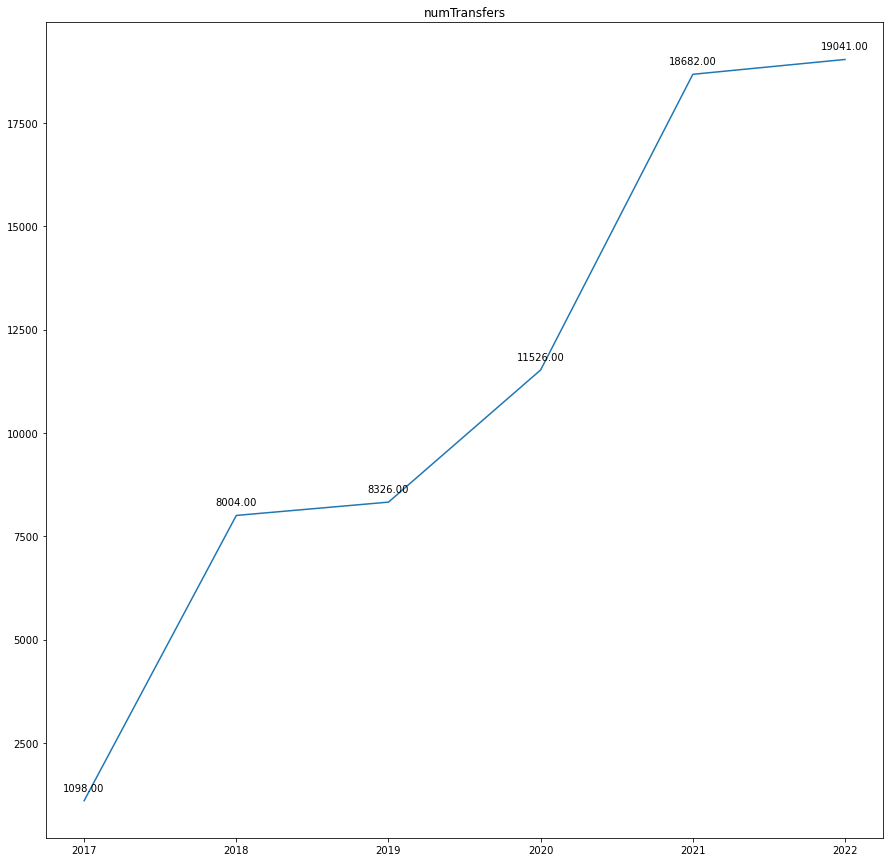

In [26]:
nt_data = totalTransfers.loc[(totalTransfers.years != 'Total')]
nt_array = nt_data['numTransfers'].tolist()
figs, axs = plt.subplots()
plt.rcParams["figure.figsize"] = (15,15)
axs.set_title("numTransfers")
axs.plot(x1, nt_array, label = "numTransfers")
for x,y in zip(x1,nt_array):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

# Encrypted Transfers Graph

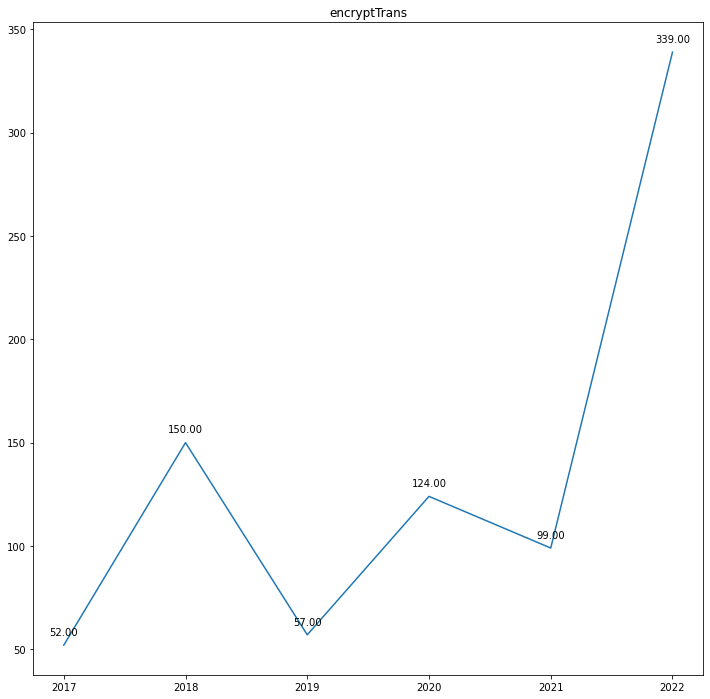

In [4]:
nt_array = nt_data['encryptTrans'].tolist()
figs, axs = plt.subplots()
plt.rcParams["figure.figsize"] = (12,12)
axs.set_title("encryptTrans")
axs.plot(x1, nt_array, label = "encryptTrans")
for x,y in zip(x1,nt_array):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

# Data going into NU IT vs Data going out NU IT

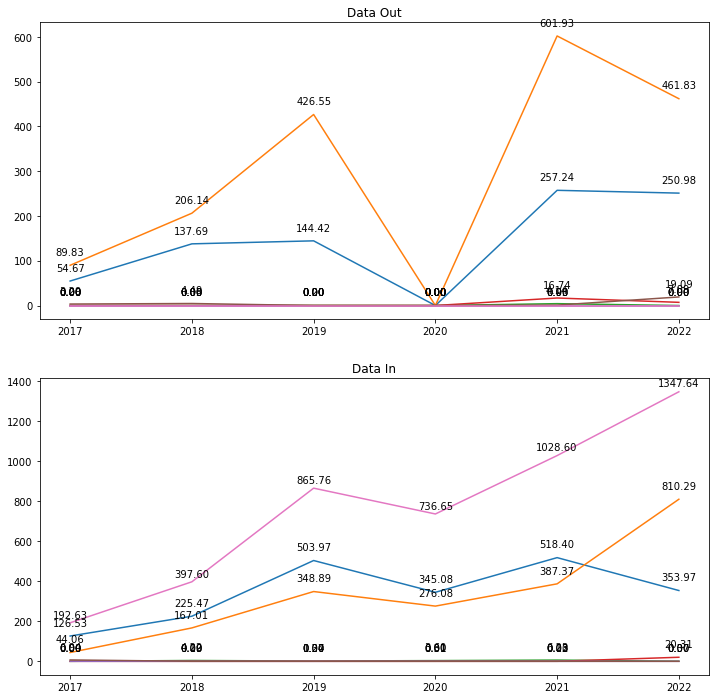

In [5]:
figs, axs = plt.subplots(2)
plt.rcParams["figure.figsize"] = (15,15)
axs[0].set_title("Data Out")
axs[0].plot(x1, rdss_DOdata, label = "RDSS")
axs[0].plot(x1, quest__DOdata, label = "Quest")
axs[0].plot(x1, aws_DOdata, label = "AWS")
axs[0].plot(x1, onedrive_DOdata, label = "OneDrive")
axs[0].plot(x1, gdep_DOdata, label = "GDEP")
axs[0].plot(x1, hpsnet_DOdata, label = "HPSNet")
axs[0].plot(x1, personal_DOdata, label = "Personal")

for x,y in zip(x1,rdss_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,quest__DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

for x,y in zip(x1,aws_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,onedrive_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,gdep_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,hpsnet_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,personal_DOdata):
    label = "{:.2f}".format(y)
    axs[0].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
#DATA IN    
axs[1].set_title("Data In")
axs[1].plot(x1, rdss_DIdata, label = "RDSS")
axs[1].plot(x1, quest__DIdata, label = "Quest")
axs[1].plot(x1, aws_DIdata, label = "AWS")
axs[1].plot(x1, onedrive_DIdata, label = "OneDrive")
axs[1].plot(x1, gdep_DIdata, label = "GDEP")
axs[1].plot(x1, hpsnet_DIdata, label = "HPSNet")
axs[1].plot(x1, personal_DIdata, label = "Personal")

for x,y in zip(x1,rdss_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,quest__DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

for x,y in zip(x1,aws_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,onedrive_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,gdep_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,hpsnet_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,personal_DIdata):
    label = "{:.2f}".format(y)
    axs[1].annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,5), # distance from text to points (x,y)
                 ha='center')


Endpoints (dataframe): (N)
    Total
    Input function for each year
    dataframe subset showing endpoints and to/from info (2022)
    Summarize endpoint activity (most active, most growth in use) over the years

# Endpoint Dataframe

In [6]:
endpoint

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,9800,133,9796,8760,89.39,2961.14,1068.59,2073.42,253792286,180.86,778.88,0.69,0.00,0.09,0.00,182.97
1,Northwestern Quest,33296,321,33277,30805,92.52,4108.58,2266.50,2033.70,196240650,1669.60,191.63,11.05,18.84,0.13,0.00,1018.82
2,Northwestern AWS,88,0,88,74,84.09,22.89,7.10,15.79,105917,0.00,7.10,0.00,0.00,0.00,0.00,4.05
3,Northwestern Quest OneDrive Pilot,175,11,173,130,74.29,44.17,23.84,20.44,2361708,0.00,22.68,0.00,0.11,0.00,0.00,0.56
4,Northwestern Quest GDEP,6,0,6,3,50.00,0.49,0.27,0.31,9,0.18,0.00,0.00,0.00,0.09,0.00,0.00
5,Northwestern Quest HPSNet,199,40,199,112,56.28,35.19,27.81,7.41,953821,18.25,0.21,0.00,0.93,0.00,0.03,7.38
6,Personal,23113,316,22957,23113,100.00,1294.33,0.00,4568.89,55284249,182.97,1018.82,4.05,0.56,0.00,7.38,0.00


# Endpoint Dataframe for 2017

In [7]:
years_end(2017)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,304,4,304,279,91.78,138.21,54.67,126.53,6490982,42.99,11.68,0.0,0.0,0.0,0.00,10.47
1,Northwestern Quest,523,34,523,383,73.23,132.37,89.83,44.06,11779670,72.98,1.52,0.0,0.0,0.0,0.00,30.65
2,Northwestern AWS,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
3,Northwestern Quest OneDrive Pilot,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
4,Northwestern Quest GDEP,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.0,0.0,0.0,0.00,0.00
5,Northwestern Quest HPSNet,13,0,13,9,69.23,10.23,3.29,6.94,725464,0.09,0.21,0.0,0.0,0.0,0.01,6.93
6,Personal,258,14,247,23113,8958.53,51.09,0.00,192.63,350302,10.47,30.65,0.0,0.0,0.0,6.93,0.00


# Endpoint Dataframe for 2018

In [8]:
years_end(2018)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,1987,76,1987,1880,94.61,316.16,137.69,225.47,47039811,47.00,33.72,0.62,0.0,0.0,0.00,62.51
1,Northwestern Quest,3564,30,3557,3352,94.05,334.66,206.14,167.01,17452958,115.96,38.49,3.60,0.0,0.0,0.00,94.75
2,Northwestern AWS,10,0,10,8,80.00,4.27,0.05,4.22,1248,0.00,0.05,0.00,0.0,0.0,0.00,0.00
3,Northwestern Quest OneDrive Pilot,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
4,Northwestern Quest GDEP,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
5,Northwestern Quest HPSNet,40,40,40,31,77.50,4.68,4.49,0.19,207,0.00,0.00,0.00,0.0,0.0,0.00,0.19
6,Personal,2403,4,2372,23113,961.84,158.14,0.00,397.60,13780769,62.51,94.75,0.00,0.0,0.0,0.19,0.00


# Endpoint Dataframe for 2019

In [9]:
years_end(2019)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,1585,9,1585,1390,87.70,603.06,144.42,503.97,49118944,45.34,97.13,0.06,0.0,0.0,0.00,109.98
1,Northwestern Quest,4714,34,4713,4401,93.36,758.83,426.55,348.89,24446612,348.25,16.61,1.31,0.0,0.0,0.00,234.96
2,Northwestern AWS,2,0,2,2,100.00,1.57,0.20,1.37,740,0.00,0.20,0.00,0.0,0.0,0.00,0.00
3,Northwestern Quest OneDrive Pilot,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
4,Northwestern Quest GDEP,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.0,0.0,0.00,0.00
5,Northwestern Quest HPSNet,0,0,0,0,0.00,0.24,0.00,0.24,0,0.00,0.00,0.00,0.0,0.0,0.00,0.24
6,Personal,2025,14,2020,23113,1141.38,351.02,0.00,865.76,10213647,109.98,234.96,0.00,0.0,0.0,0.24,0.00


# Endpoint Dataframe for 2020

In [10]:
years_end(2020)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,1969,28,1969,1712,86.95,540.82,0.0,345.08,65333305,27.84,157.97,0.00,0.0,0.09,0.00,0.00
1,Northwestern Quest,5828,62,5826,5349,91.78,686.12,0.0,276.08,26568244,316.86,70.18,1.89,0.0,0.13,0.00,34.08
2,Northwestern AWS,22,0,22,21,95.45,6.32,0.0,3.60,13205,0.00,2.72,0.00,0.0,0.00,0.00,1.71
3,Northwestern Quest OneDrive Pilot,0,0,0,0,0.00,0.00,0.0,0.00,0,0.00,0.00,0.00,0.0,0.00,0.00,0.00
4,Northwestern Quest GDEP,6,0,6,3,50.00,0.49,0.0,0.31,9,0.18,0.00,0.00,0.0,0.09,0.00,0.00
5,Northwestern Quest HPSNet,0,0,0,0,0.00,0.01,0.0,0.01,0,0.00,0.00,0.00,0.0,0.00,0.00,0.01
6,Personal,3701,34,3676,23113,624.51,43.22,0.0,736.65,1422873,0.00,34.08,1.71,0.0,0.00,0.01,0.00


# Endpoint Dataframe for 2021

In [11]:
years_end(2021)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,2429,13,2426,2213,91.11,759.31,257.24,518.40,67569263,16.33,240.78,0.00,0.00,0.0,0.00,0.00
1,Northwestern Quest,9031,47,9024,8315,92.07,953.60,601.93,387.37,61968772,498.11,35.71,4.25,0.13,0.0,0.00,87.85
2,Northwestern AWS,47,0,47,39,82.98,10.37,4.14,6.23,90713,0.00,4.14,0.00,0.00,0.0,0.00,1.97
3,Northwestern Quest OneDrive Pilot,30,0,30,25,83.33,16.87,16.74,0.13,775204,0.00,16.74,0.00,0.00,0.0,0.00,0.00
4,Northwestern Quest GDEP,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
5,Northwestern Quest HPSNet,17,0,17,9,52.94,0.93,0.93,0.02,1861,0.00,0.00,0.00,0.00,0.0,0.02,0.00
6,Personal,7128,39,7127,23113,324.26,102.01,0.00,1028.60,13961255,0.00,87.85,1.97,0.00,0.0,0.00,0.00


# Endpoint Dataframes for 2022

In [12]:
years_end(2022)

,source_endpoints,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,Northwestern Quest RDSS,Northwestern Quest,Northwestern AWS,Northwestern Quest OneDrive Pilot,Northwestern Quest GDEP,Northwestern Quest HPSNet,Personal
0,Northwestern Quest RDSS,1526,3,1525,1286,84.27,603.58,250.98,353.97,18239981,1.37,237.61,0.00,0.00,0.0,0.0,0.00
1,Northwestern Quest,9636,114,9634,9005,93.45,1242.99,461.83,810.29,54024394,317.44,29.13,0.00,18.71,0.0,0.0,536.54
2,Northwestern AWS,7,0,7,4,57.14,0.37,0.00,0.37,11,0.00,0.00,0.00,0.00,0.0,0.0,0.37
3,Northwestern Quest OneDrive Pilot,145,11,143,105,72.41,27.30,7.09,20.31,1586504,0.00,5.94,0.00,0.11,0.0,0.0,0.56
4,Northwestern Quest GDEP,0,0,0,0,0.00,0.00,0.00,0.00,0,0.00,0.00,0.00,0.00,0.0,0.0,0.00
5,Northwestern Quest HPSNet,129,0,129,63,48.84,19.09,19.09,0.00,226289,18.16,0.00,0.00,0.93,0.0,0.0,0.00
6,Personal,7598,211,7515,23113,304.20,588.84,0.00,1347.64,15555403,0.00,536.54,0.37,0.56,0.0,0.0,0.00


# Number of Transfers by Endpoint

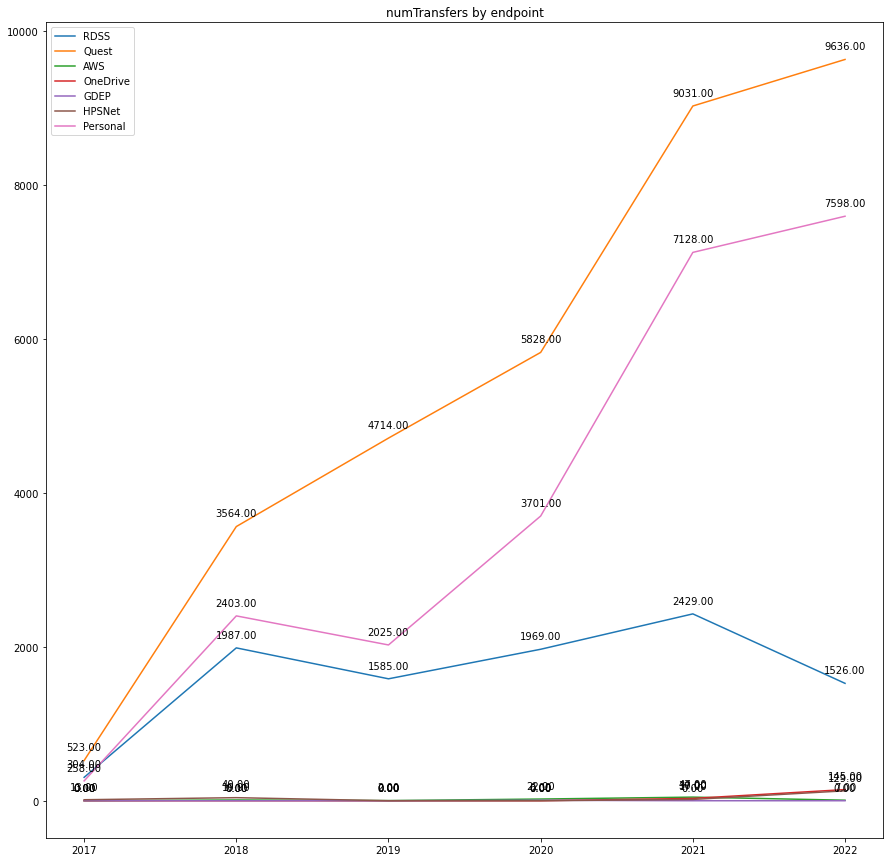

In [13]:
figs, axs = plt.subplots()
plt.rcParams["figure.figsize"] = (15,15)
axs.set_title("numTransfers by endpoint")
axs.plot(x1, rdss_NTdata, label = "RDSS")
axs.plot(x1, quest__NTdata, label = "Quest")
axs.plot(x1, aws_NTdata, label = "AWS")
axs.plot(x1, onedrive_NTdata, label = "OneDrive")
axs.plot(x1, gdep_NTdata, label = "GDEP")
axs.plot(x1, hpsnet_NTdata, label = "HPSNet")
axs.plot(x1, personal_NTdata, label = "Personal")

for x,y in zip(x1,rdss_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,quest__NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

for x,y in zip(x1,aws_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,onedrive_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,gdep_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,hpsnet_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,personal_NTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.legend()
plt.show()

# Bytes Transferred by Endpoint (TB)

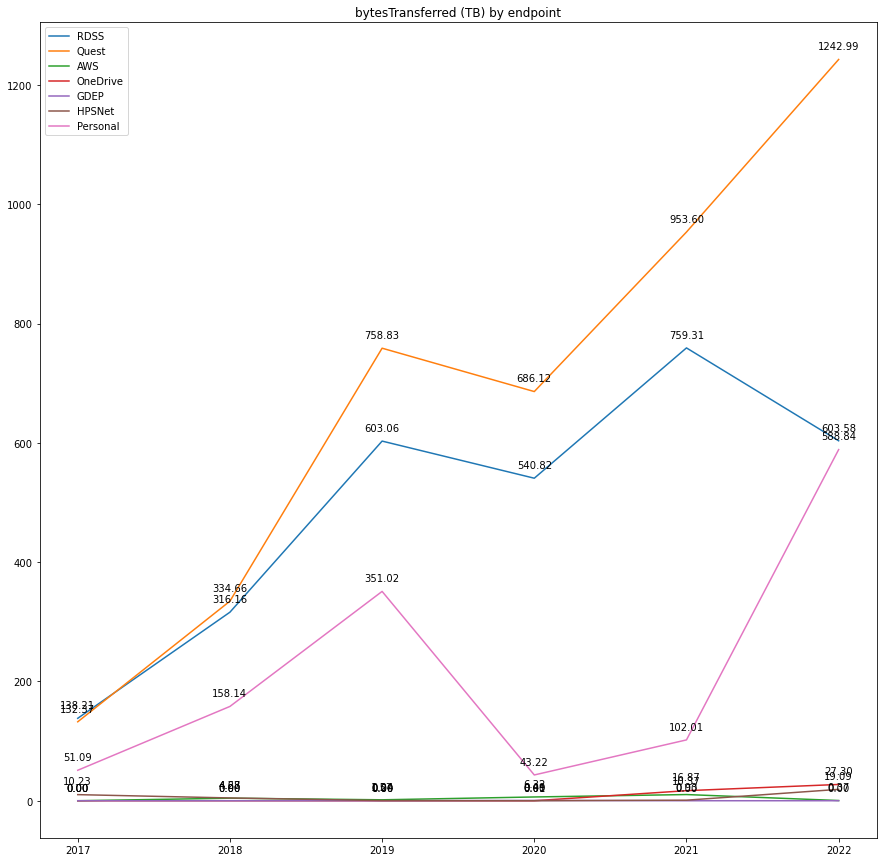

In [14]:
figs, axs = plt.subplots()
plt.rcParams["figure.figsize"] = (15,15)
axs.set_title("bytesTransferred (TB) by endpoint")
axs.plot(x1, rdss_BTdata, label = "RDSS")
axs.plot(x1, quest__BTdata, label = "Quest")
axs.plot(x1, aws_BTdata, label = "AWS")
axs.plot(x1, onedrive_BTdata, label = "OneDrive")
axs.plot(x1, gdep_BTdata, label = "GDEP")
axs.plot(x1, hpsnet_BTdata, label = "HPSNet")
axs.plot(x1, personal_BTdata, label = "Personal")

for x,y in zip(x1,rdss_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,quest__BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')

for x,y in zip(x1,aws_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,onedrive_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,gdep_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,hpsnet_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(x1,personal_BTdata):
    label = "{:.2f}".format(y)
    axs.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center')
plt.legend()
plt.show()

Users (dataframe): (D)
    Show all users over all years
    Input function for each year
    Show power users for each year (head)
    Pull individual user info via input function

# Users Dataframe

In [15]:
years_user("Total")

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,kra804@northwestern.edu,70,0,70,57,81.43,15.20,15.20,15.20,2801755,...,0,0,0.00,0.00,0,0,0.00,0.00,0,0
1,jon9348@northwestern.edu,58,0,47,46,79.31,8.31,8.31,8.31,23974,...,0,0,6.80,0.05,16959,2,0.05,8.26,10,18174
2,anton@globusid.org,32,1,32,20,62.50,0.55,0.55,0.55,7020,...,0,0,0.04,0.11,1,2,0.06,0.29,7794,11
3,pjh116@northwestern.edu,125,0,125,113,90.40,14.54,14.54,14.54,605339,...,0,0,0.00,0.00,0,0,0.00,0.06,0,5126
4,jlu967@northwestern.edu,335,0,335,319,95.22,5.64,5.64,5.64,10888,...,0,0,0.00,0.00,0,0,5.03,0.51,4231,2413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,kir4661@northwestern.edu,1,0,1,0,0.00,0.08,0.08,0.08,10,...,0,0,0.00,0.00,0,0,0.00,0.08,0,15
722,aal5184@northwestern.edu,1,0,1,1,100.00,0.00,0.00,0.00,18872,...,0,0,0.00,0.00,0,0,0.00,0.00,0,18858
723,qlp9135@northwestern.edu,2,0,2,1,50.00,0.06,0.06,0.06,3391,...,0,0,0.00,0.00,0,0,0.00,0.00,0,0
724,vxz6600@northwestern.edu,6,0,6,3,50.00,0.01,0.01,0.01,1604,...,0,0,0.00,0.00,0,0,0.00,0.01,0,297111


# Users Dataframe for 2017

In [16]:
years_user(2017)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,kra804@northwestern.edu,19,0,19,11,57.89,1.79,1.79,1.79,1029360,...,0,0,0.00,0.00,0,0,0.00,0.00,0,0
1,jon9348@northwestern.edu,30,0,19,26,86.67,7.14,7.14,7.14,22860,...,0,0,6.80,0.05,16959,2,0.05,7.09,3,16978
2,anton@globusid.org,6,1,6,3,50.00,0.29,0.29,0.29,3,...,0,0,0.04,0.11,1,2,0.00,0.19,1,3
3,pjh116@northwestern.edu,75,0,75,67,89.33,5.32,5.32,5.32,262297,...,0,0,0.00,0.00,0,0,0.00,0.06,0,5126
4,jlu967@northwestern.edu,24,0,24,24,100.00,0.70,0.70,0.70,1220,...,0,0,0.00,0.00,0,0,0.45,0.25,56,1164
5,pts987@northwestern.edu,53,0,53,50,94.34,0.21,0.21,0.21,14833,...,0,0,0.00,0.00,0,0,0.21,0.00,14444,40
6,northwestern@globusid.org,139,6,139,106,76.26,46.51,46.51,46.51,3687728,...,0,0,0.11,0.21,4,148873,0.00,12.26,0,47013
7,ami424@northwestern.edu,46,0,46,42,91.30,7.93,7.93,7.93,5901583,...,0,0,0.00,0.00,0,0,0.00,0.05,2,58
8,akd4572@northwestern.edu,38,25,38,23,60.53,4.42,4.42,4.42,1031477,...,0,0,0.00,0.00,0,0,0.00,0.00,0,1
9,mki453@northwestern.edu,42,0,42,36,85.71,21.29,21.29,21.29,300700,...,0,0,0.00,0.00,0,0,0.12,1.04,41,309


# Users Dataframe for 2018

In [17]:
years_user(2018)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,fe2r@northwestern.edu,98,0,98,98,100.00,0.04,0.04,0.04,277,...,0,0,0.0,0.0,0,0,0.01,0.03,53,110
1,gtg4817@northwestern.edu,455,0,455,442,97.14,24.90,24.90,24.90,842714,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
2,pjh116@northwestern.edu,50,0,50,46,92.00,9.22,9.22,9.22,343042,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
3,ami424@northwestern.edu,130,0,130,122,93.85,9.14,9.14,9.14,5897287,...,0,0,0.0,0.0,0,0,0.18,0.03,671,7086
4,jon9348@northwestern.edu,15,0,15,8,53.33,1.17,1.17,1.17,549,...,0,0,0.0,0.0,0,0,0.00,1.17,5,1015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,bar6270@northwestern.edu,3,0,3,3,100.00,0.00,0.00,0.00,1108848,...,0,0,0.0,0.0,0,0,0.00,0.00,0,1108803
119,ags3417@northwestern.edu,9,0,9,8,88.89,0.05,0.05,0.05,23,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
120,spm9410@northwestern.edu,1,0,1,0,0.00,0.03,0.03,0.03,1313,...,0,0,0.0,0.0,0,0,0.00,0.03,0,63740
121,yzh5179@northwestern.edu,9,0,9,9,100.00,0.91,0.91,0.91,502,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0


# Users Dataframe for 2019

In [18]:
years_user(2019)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,fe2r@northwestern.edu,109,0,109,109,100.00,0.02,0.02,0.02,531,...,0,0,0.0,0.0,0,0,0.01,0.01,92,194
1,pap7021@northwestern.edu,529,0,529,499,94.33,6.37,6.37,6.37,62294,...,0,0,0.0,0.0,0,0,3.86,0.08,455677,469
2,rbe9789@northwestern.edu,284,0,284,279,98.24,2.22,2.22,2.22,42085,...,0,0,0.0,0.0,0,0,1.46,0.02,105416,410
3,mjs580@northwestern.edu,241,0,241,220,91.29,25.84,25.84,25.84,33517982,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
4,northwestern@globusid.org,53,6,53,45,84.91,1.52,1.52,1.52,122998,...,0,0,0.0,0.0,1,0,0.00,0.05,0,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,jag8215@northwestern.edu,1,0,1,1,100.00,0.01,0.01,0.01,2058,...,0,0,0.0,0.0,0,0,0.00,0.01,0,1029
128,gil208@northwestern.edu,1,0,1,1,100.00,0.01,0.01,0.01,2,...,0,0,0.0,0.0,0,0,0.00,0.01,0,1
129,apv175@northwestern.edu,5,0,5,4,80.00,0.02,0.02,0.02,11,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
130,txp9580@northwestern.edu,1,0,1,1,100.00,0.12,0.12,0.12,221,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0


# Users Dataframe for 2020

In [19]:
years_user(2020)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,chc6345@northwestern.edu,112,0,112,94,50.89,0.94,0.94,0.94,842549,...,0,0,0.0,0.0,0,0,0.90,0.05,424810,445125
1,jyz1425@northwestern.edu,260,1,260,251,17.69,0.20,0.20,0.20,284530,...,0,0,0.0,0.0,0,0,0.13,0.01,255138,34044
2,phd668@northwestern.edu,153,0,153,139,13.07,0.92,0.92,0.92,122458,...,0,0,0.0,0.0,0,0,0.22,0.70,6801,142068
3,qyw0254@northwestern.edu,49,0,49,35,230.61,0.75,0.75,0.75,20657173,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
4,ypo687@northwestern.edu,44,0,44,40,725.00,2.57,2.57,2.57,1559810,...,0,0,0.0,0.0,0,0,0.00,0.00,1665,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,my268@yale.edu,3,0,3,3,266.67,0.04,0.04,0.04,54,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
233,aal3484@northwestern.edu,3,0,3,3,33.33,0.00,0.00,0.00,6,...,0,0,0.0,0.0,0,0,0.00,0.00,0,3
234,aml4540@northwestern.edu,2,0,2,1,650.00,0.00,0.00,0.00,3,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
235,adl1355@northwestern.edu,3,0,3,1,0.00,1.29,1.29,1.29,35893,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0


# Users Dataframe for 2021

In [20]:
years_user(2021)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,northwestern@globusid.org,365,0,365,365,100.00,15.20,15.20,15.20,18128,...,0,0,0.0,0.0,0,0,0.00,0.01,0,17398
1,btk2142@northwestern.edu,5196,0,5196,4912,94.53,8.31,8.31,8.31,1128956,...,0,0,0.0,0.0,0,0,0.16,0.03,1488,30270
2,kam9898@northwestern.edu,9,0,9,9,100.00,0.55,0.55,0.55,2277,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
3,gyj4828@northwestern.edu,1807,0,1807,1783,98.67,14.54,14.54,14.54,1187517,...,0,0,0.0,0.0,0,0,0.19,0.21,12967,43469
4,mjs580@northwestern.edu,455,0,455,417,91.65,5.64,5.64,5.64,61793641,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,dke1477@northwestern.edu,1,0,1,1,100.00,0.01,0.01,0.01,2,...,0,0,0.0,0.0,0,0,0.00,0.00,1,0
322,jxh0945@northwestern.edu,4,0,4,3,75.00,0.01,0.01,0.01,55,...,0,0,0.0,0.0,0,0,0.00,0.00,39,0
323,pfj185@northwestern.edu,15,12,15,15,100.00,4.74,4.74,4.74,64,...,0,0,0.0,0.0,0,0,0.00,0.00,26,6
324,rss365@northwestern.edu,1,0,1,1,100.00,13.79,13.79,13.79,41815,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0


# Users Dataframe for 2022

In [21]:
years_user(2022)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
0,wjh670@northwestern.edu,2143,0,2143,2116,98.74,0.19,0.19,0.19,93660,...,0,0,0.0,0.0,0,0,0.00,0.19,0,72304
1,northwestern@globusid.org,218,0,218,217,99.54,0.05,0.05,0.05,12677,...,0,0,0.0,0.0,0,0,0.00,0.01,0,12241
2,ajf4103@northwestern.edu,195,0,195,185,94.87,1.75,1.75,1.75,125636,...,0,0,0.0,0.0,0,0,0.01,0.00,394,0
3,pfj185@northwestern.edu,118,118,118,118,100.00,0.00,0.00,0.00,350,...,0,0,0.0,0.0,0,0,0.00,0.00,111,64
4,pds3264@northwestern.edu,29,0,29,29,100.00,0.02,0.02,0.02,52527,...,0,0,0.0,0.0,0,0,0.01,0.02,50068,2070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,aal5184@northwestern.edu,1,0,1,1,100.00,0.00,0.00,0.00,18872,...,0,0,0.0,0.0,0,0,0.00,0.00,0,18858
354,qlp9135@northwestern.edu,2,0,2,1,50.00,0.06,0.06,0.06,3391,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0
355,vxz6600@northwestern.edu,6,0,6,3,50.00,0.01,0.01,0.01,1604,...,0,0,0.0,0.0,0,0,0.00,0.01,0,297111
356,adl1355@northwestern.edu,6,0,6,3,50.00,0.23,0.23,0.23,15647,...,0,0,0.0,0.0,0,0,0.00,0.00,0,0


# Power Users Dataframe for 2022
### (Top 10% of Users)

In [22]:
power_users(2022)

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
254,twp7981@northwestern.edu,46,0,46,42,91.30,477.26,477.26,477.26,2971316,...,0,0,0.0,0.00,0,0,0.00,477.26,0,2917606
9,mjs580@northwestern.edu,586,0,586,491,83.79,90.19,90.19,90.19,15115769,...,0,0,0.0,0.00,0,0,0.00,0.00,0,0
37,bib0660@northwestern.edu,21,0,21,21,100.00,83.10,83.10,83.10,32046,...,0,0,0.0,0.00,0,0,0.00,0.18,0,14
67,amh409@northwestern.edu,117,1,117,77,65.81,61.08,61.08,61.08,7258105,...,0,0,0.0,0.00,0,0,0.97,0.14,1824949,15761
156,mhc0155@northwestern.edu,170,0,170,91,53.53,60.89,60.89,60.89,506430,...,0,0,0.0,0.00,0,0,0.00,0.00,29,0
21,kam988@northwestern.edu,163,0,163,137,84.05,56.98,56.98,56.98,2427807,...,0,0,0.0,0.00,0,0,0.00,0.00,0,0
258,adam.williams@jax.org,6,4,6,4,66.67,35.84,35.84,35.84,1342986,...,0,0,0.0,0.00,0,0,0.00,15.38,0,633805
133,smg3741@northwestern.edu,152,0,17,136,89.47,35.14,35.14,35.14,17436,...,0,0,0.0,0.00,0,0,0.04,35.10,5293,3456
59,u241295@bcm.edu,11,0,11,8,72.73,29.90,29.90,29.90,2246521,...,0,0,0.0,0.00,0,0,21.68,0.00,3068290,0
110,mcs8686@northwestern.edu,20,0,20,17,85.00,24.60,24.60,24.60,319281,...,0,0,0.0,0.00,0,0,15.07,9.53,562,157410


# Search for User Activity
### (Total, but can be for any given year)

In [23]:
get_user('twp7981', "Total")

,user_name,numTransfers,encryptTrans,validatedTrans,successfulTransfers,successRate,bytesTransfered,dataOut,dataIn,filesDirectories,...,files_to_Northwestern Quest GDEP,files_from_Northwestern Quest GDEP,to_Northwestern Quest HPSNet,from_Northwestern Quest HPSNet,files_to_Northwestern Quest HPSNet,files_from_Northwestern Quest HPSNet,to_Personal,from_Personal,files_to_Personal,files_from_Personal
645,twp7981@northwestern.edu,46,0,46,42,91.3,477.26,477.26,477.26,2971316,...,0,0,0.0,0.0,0,0,0.0,477.26,0,2917606


# Search for Transfer by TaskID

In [27]:
def get_transfer(taskID):
    return df.loc[(df.taskid == taskID)]
get_transfer('c04be1c4-d002-11ec-9ebf-c3c2ad65d825')

,user_name,task_type,request_time,completion_time,source_endpoint_owner,source_endpoint,source_endpoint_id,destination_endpoint_owner,destination_endpoint,destination_endpoint_id,...,duration(secs),sync_level,encrypt_data,verify_checksum,preserve_modification_time,skip_source_errors,fail_on_quota_errors,is_sync_delete,sync_deletes,filter_rules
72686,twp7981@northwestern.edu,t,2022-05-10 01:44:38.485056,2022-05-10 01:44:41.331317,5be0d5ad-808c-4168-8aeb-37ee5bbadb1f@clients.a...,HI Panfs Collection,9cbad5da-51d0-4693-94a8-1f919f4d0d4a,northwestern@globusid.org,Northwestern Quest,d5990400-6d04-11e5-ba46-22000b92c6ec,...,2.846261,NaN,False,True,False,False,False,False,0.0,NaN


In [33]:
!jupyter nbconvert --to html --TagRemovePreprocessor.remove_cell_tags='{"remove_this"}' Globus_Metrics_Intern_Project.ipynb --no-input

C:\Users\Ozymandiaz\anaconda3\lib\site-packages\traitlets\traitlets.py:2202: FutureWarning: Supporting extra quotes around strings is deprecated in traitlets 5.0. You can use 'remove_this' instead of "'remove_this'" if you require traitlets >=5.
  warn(
[NbConvertApp] Converting notebook Globus_Metrics_Intern_Project.ipynb to html
[NbConvertApp] Writing 1075516 bytes to Globus_Metrics_Intern_Project.html
